In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.sample(5)

age          job   marital  education default  balance housing loan  \
7524    24      student    single  secondary      no        7     yes   no   
37080   47  blue-collar   married    primary      no     4227     yes   no   
24856   45  blue-collar  divorced    primary      no     2702      no   no   
26464   31   management   married   tertiary      no       10      no   no   
16444   48   technician    single  secondary      no      329      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
7524    unknown   30   may      86.0       3.0   -1.0       0.0  unknown   no  
37080  cellular   13   may     659.0       1.0   -1.0       0.0  unknown  yes  
24856  cellular   18   nov     110.0       1.0   -1.0       0.0  unknown   no  
26464  cellular   20   nov     283.0       1.0   -1.0       0.0  unknown   no  
16444  cellular   23   jul     711.0       1.0   -1.0       0.0  unknown   no

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45663 entries, 0 to 45662
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45663 non-null  int64  
 1   job        45663 non-null  object 
 2   marital    45663 non-null  object 
 3   education  45663 non-null  object 
 4   default    45663 non-null  object 
 5   balance    45663 non-null  int64  
 6   housing    45663 non-null  object 
 7   loan       45663 non-null  object 
 8   contact    45663 non-null  object 
 9   day        45663 non-null  int64  
 10  month      45663 non-null  object 
 11  duration   45317 non-null  float64
 12  campaign   45281 non-null  float64
 13  pdays      45446 non-null  float64
 14  previous   45395 non-null  float64
 15  poutcome   45663 non-null  object 
 16  y          45355 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 5.9+ MB


In [5]:
#Mengubah tipe data kolom 'y' menjadi numerikal

df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45663 entries, 0 to 45662
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45663 non-null  int64  
 1   job        45663 non-null  object 
 2   marital    45663 non-null  object 
 3   education  45663 non-null  object 
 4   default    45663 non-null  object 
 5   balance    45663 non-null  int64  
 6   housing    45663 non-null  object 
 7   loan       45663 non-null  object 
 8   contact    45663 non-null  object 
 9   day        45663 non-null  int64  
 10  month      45663 non-null  object 
 11  duration   45317 non-null  float64
 12  campaign   45281 non-null  float64
 13  pdays      45446 non-null  float64
 14  previous   45395 non-null  float64
 15  poutcome   45663 non-null  object 
 16  y          45355 non-null  float64
dtypes: float64(5), int64(3), object(9)
memory usage: 5.9+ MB


In [7]:
# Mengelompokkan kolom kategori dan numerik

cats = ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month','poutcome'] #kategori
nums = ['age','balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y'] #numerik

In [8]:
df.describe()

age        balance           day      duration      campaign  \
count  45663.000000   45663.000000  45663.000000  45317.000000  45281.000000   
mean      40.937389    1363.058012     15.811248    258.226582      2.764250   
std       10.616812    3049.909173      8.319972    257.642594      3.097611   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     449.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.500000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous             y  
count  45446.000000  45395.000000  45355.000000  
mean      40.166857      0.579667      0.116856  
std      100.063270      2.303390      0.321252  
min       -1.000000      0.000000      0.000000  
25%       -1.000000      0.000000      0.000000  
50%       -1.000000      0.000000      0.000000  
75%       -1.000000      0.000000      0.000000  
max      871.000000    275.000000      1.000000

In [9]:
df[cats].describe()

job  marital  education default housing   loan   contact  \
count         45663    45663      45663   45663   45663  45663     45663   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9816    27473      23418   44839   25380  38350     29574   

        month poutcome  
count   45663    45663  
unique     12        4  
top       may  unknown  
freq    13910    37344

In [67]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration     346
campaign     382
pdays        217
previous     268
poutcome       0
y            308
dtype: int64

In [120]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom job:
job
blue-collar      9816
management       9566
technician       7684
admin.           5219
services         4187
retired          2293
self-employed    1589
entrepreneur     1503
unemployed       1312
housemaid        1254
student           946
unknown           294
Name: count, dtype: int64

Value count kolom marital:
marital
married     27473
single      12928
divorced     5262
Name: count, dtype: int64

Value count kolom education:
education
secondary    23418
tertiary     13449
primary       6914
unknown       1882
Name: count, dtype: int64

Value count kolom default:
default
no     44839
yes      824
Name: count, dtype: int64

Value count kolom housing:
housing
yes    25380
no     20283
Name: count, dtype: int64

Value count kolom loan:
loan
no     38350
yes     7313
Name: count, dtype: int64

Value count kolom contact:
contact
cellular     29574
unknown      13151
telephone     2938
Name: count, dtype: int64

Value count kolom month:
month
may    13910
jul

# Multivariate Analysis

## Heatmap

In [60]:
df[nums].corr()

age   balance       day  duration  campaign     pdays  \
age       1.000000  0.096627 -0.008973 -0.004636  0.004529 -0.023160   
balance   0.096627  1.000000  0.005281  0.021197 -0.013760  0.002935   
day      -0.008973  0.005281  1.000000 -0.030334  0.162630 -0.092822   
duration -0.004636  0.021197 -0.030334  1.000000 -0.084078 -0.001776   
campaign  0.004529 -0.013760  0.162630 -0.084078  1.000000 -0.089196   
pdays    -0.023160  0.002935 -0.092822 -0.001776 -0.089196  1.000000   
previous  0.002382  0.016687 -0.051879  0.001197 -0.033075  0.454971   
y         0.024804  0.052259 -0.028067  0.395379 -0.073216  0.103171   

          previous         y  
age       0.002382  0.024804  
balance   0.016687  0.052259  
day      -0.051879 -0.028067  
duration  0.001197  0.395379  
campaign -0.033075 -0.073216  
pdays     0.454971  0.103171  
previous  1.000000  0.094113  
y         0.094113  1.000000

<Axes: >

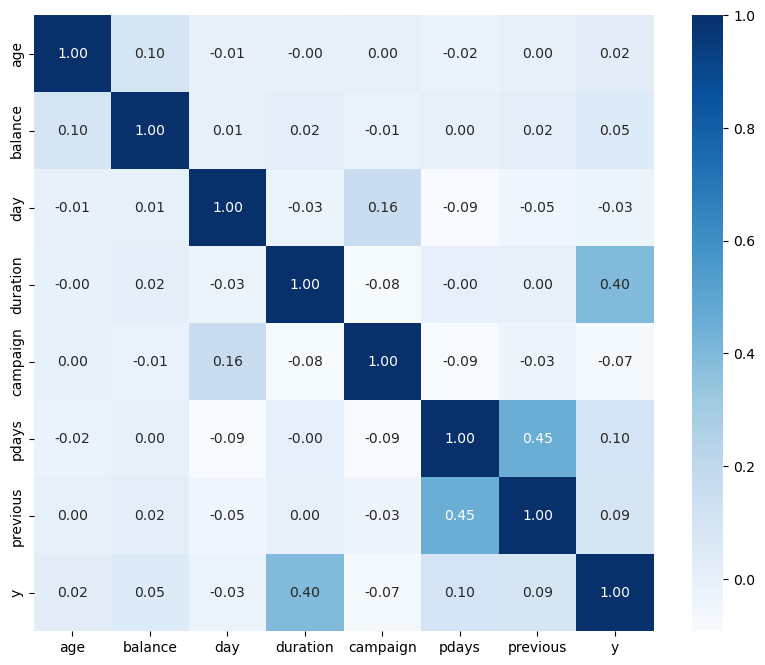

In [10]:
#Correlation Heatmap pada kolom-kolom numerical

plt.figure(figsize=(10, 8))
sns.heatmap(df[nums].corr(), cmap='Blues', annot=True, fmt='.2f')

**Melihat distribusi data apakah terdapat outliers atau tidak:**

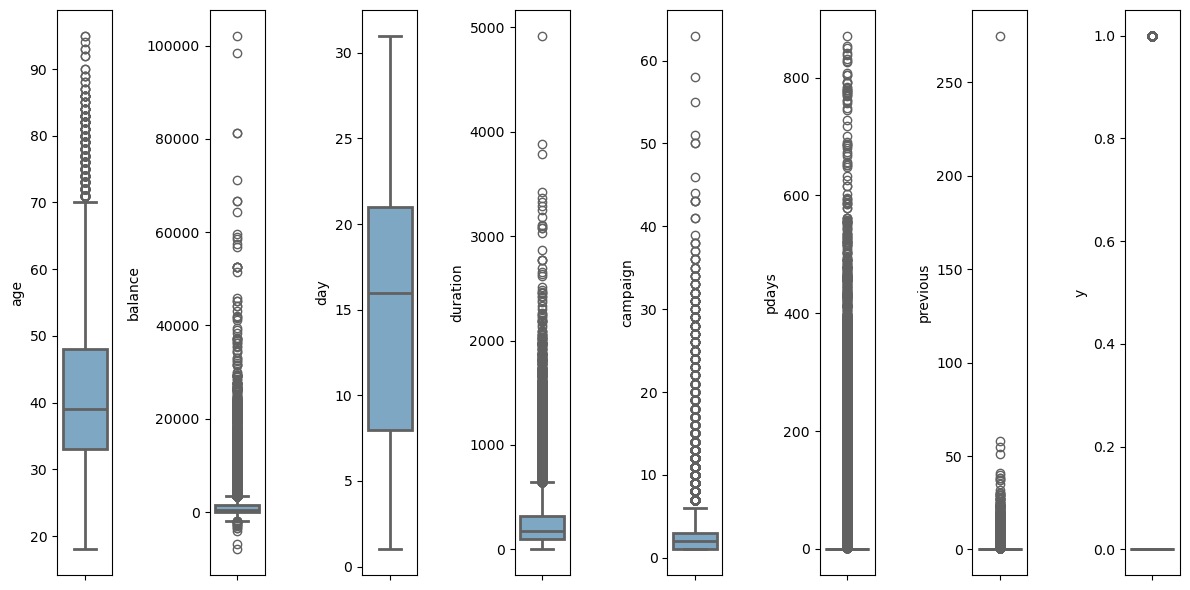

In [77]:
features = nums
plt.figure(figsize=(12, 6))

for i in range (len (features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], linewidth=2, palette='PuBu')
    plt.tight_layout()

**Karena terdapat outliers yang banyak sehingga diperlukan metode spearman karena lebih tahan terhadap outliers**

In [78]:
df[nums].corr(method='spearman')

age   balance       day  duration  campaign     pdays  \
age       1.000000  0.095556 -0.008849 -0.033138  0.037300 -0.016444   
balance   0.095556  1.000000  0.001961  0.041976 -0.032202  0.069434   
day      -0.008849  0.001961  1.000000 -0.058435  0.140022 -0.092182   
duration -0.033138  0.041976 -0.058435  1.000000 -0.107619  0.028805   
campaign  0.037300 -0.032202  0.140022 -0.107619  1.000000 -0.113561   
pdays    -0.016444  0.069434 -0.092182  0.028805 -0.113561  1.000000   
previous -0.010949  0.079649 -0.088140  0.031687 -0.109235  0.985718   
y        -0.008948  0.099165 -0.029242  0.342642 -0.084255  0.153864   

          previous         y  
age      -0.010949 -0.008948  
balance   0.079649  0.099165  
day      -0.088140 -0.029242  
duration  0.031687  0.342642  
campaign -0.109235 -0.084255  
pdays     0.985718  0.153864  
previous  1.000000  0.169186  
y         0.169186  1.000000

<Axes: >

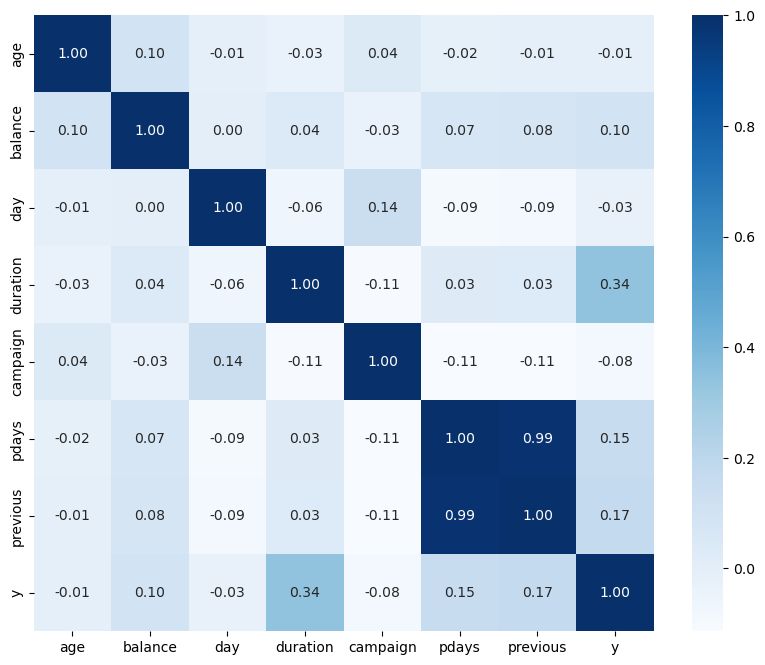

In [55]:
#Korelasi menggunakan metode spearman, kalo misal banyak outlier
plt.figure(figsize=(10, 8))
sns.heatmap(df[nums].corr(method = 'spearman'), cmap='Blues', annot=True, fmt='.2f')

**Penjelasan Heatmap:** <br>
1. Mayoritas korelasi antar feature termasuk lemah karena memiliki nilai kurang dari 0.3, kecuali pada feature previous dan pdays
2. Feature *duration* memiliki korelasi sedang terhadap feature *y* atau klien berlangganan deposito. Yang dimana hal tersebut menunjukkan semakin lama durasi kontak dengan klien, maka klien berpotensi untuk berlangganan deposito
3. Terdapat korelasi kuat (diatas 0.7) yaitu pada korelasi feature *previous* dengan *pdays*, sehingga salah satu dari fitur tersebut harus dihilangkan agar tidak menyebabkan multicollinearity.

## Pair Plots

<Figure size 1000x800 with 0 Axes>

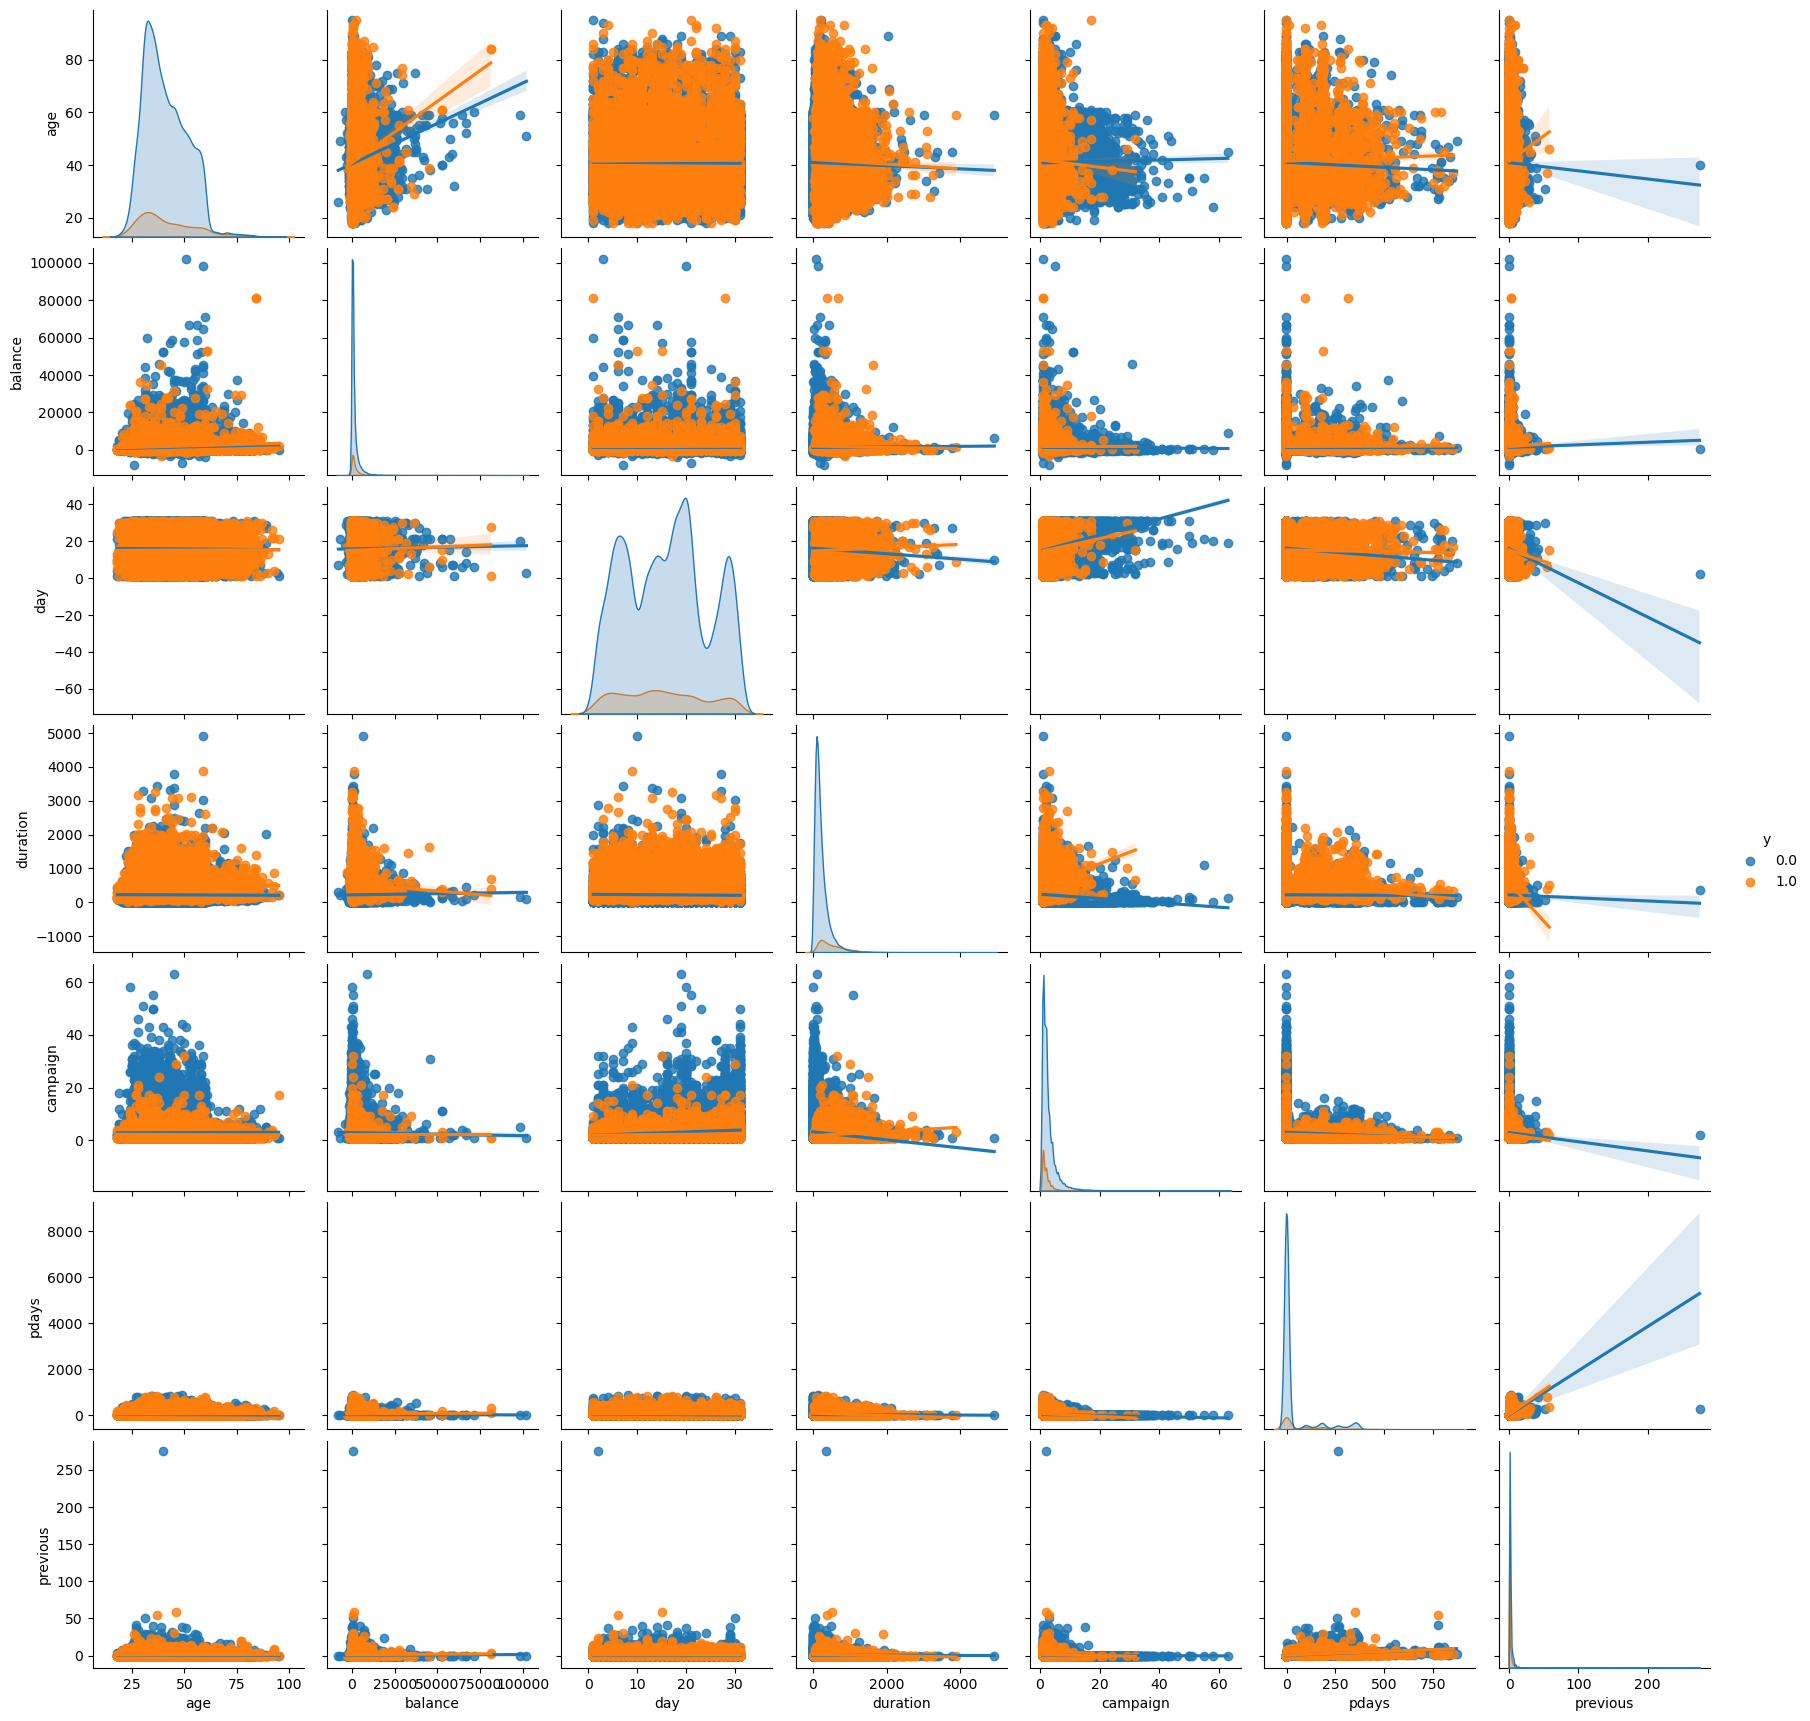

In [80]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, diag_kind='kde', hue='y', kind='reg')

<Figure size 1000x800 with 0 Axes>

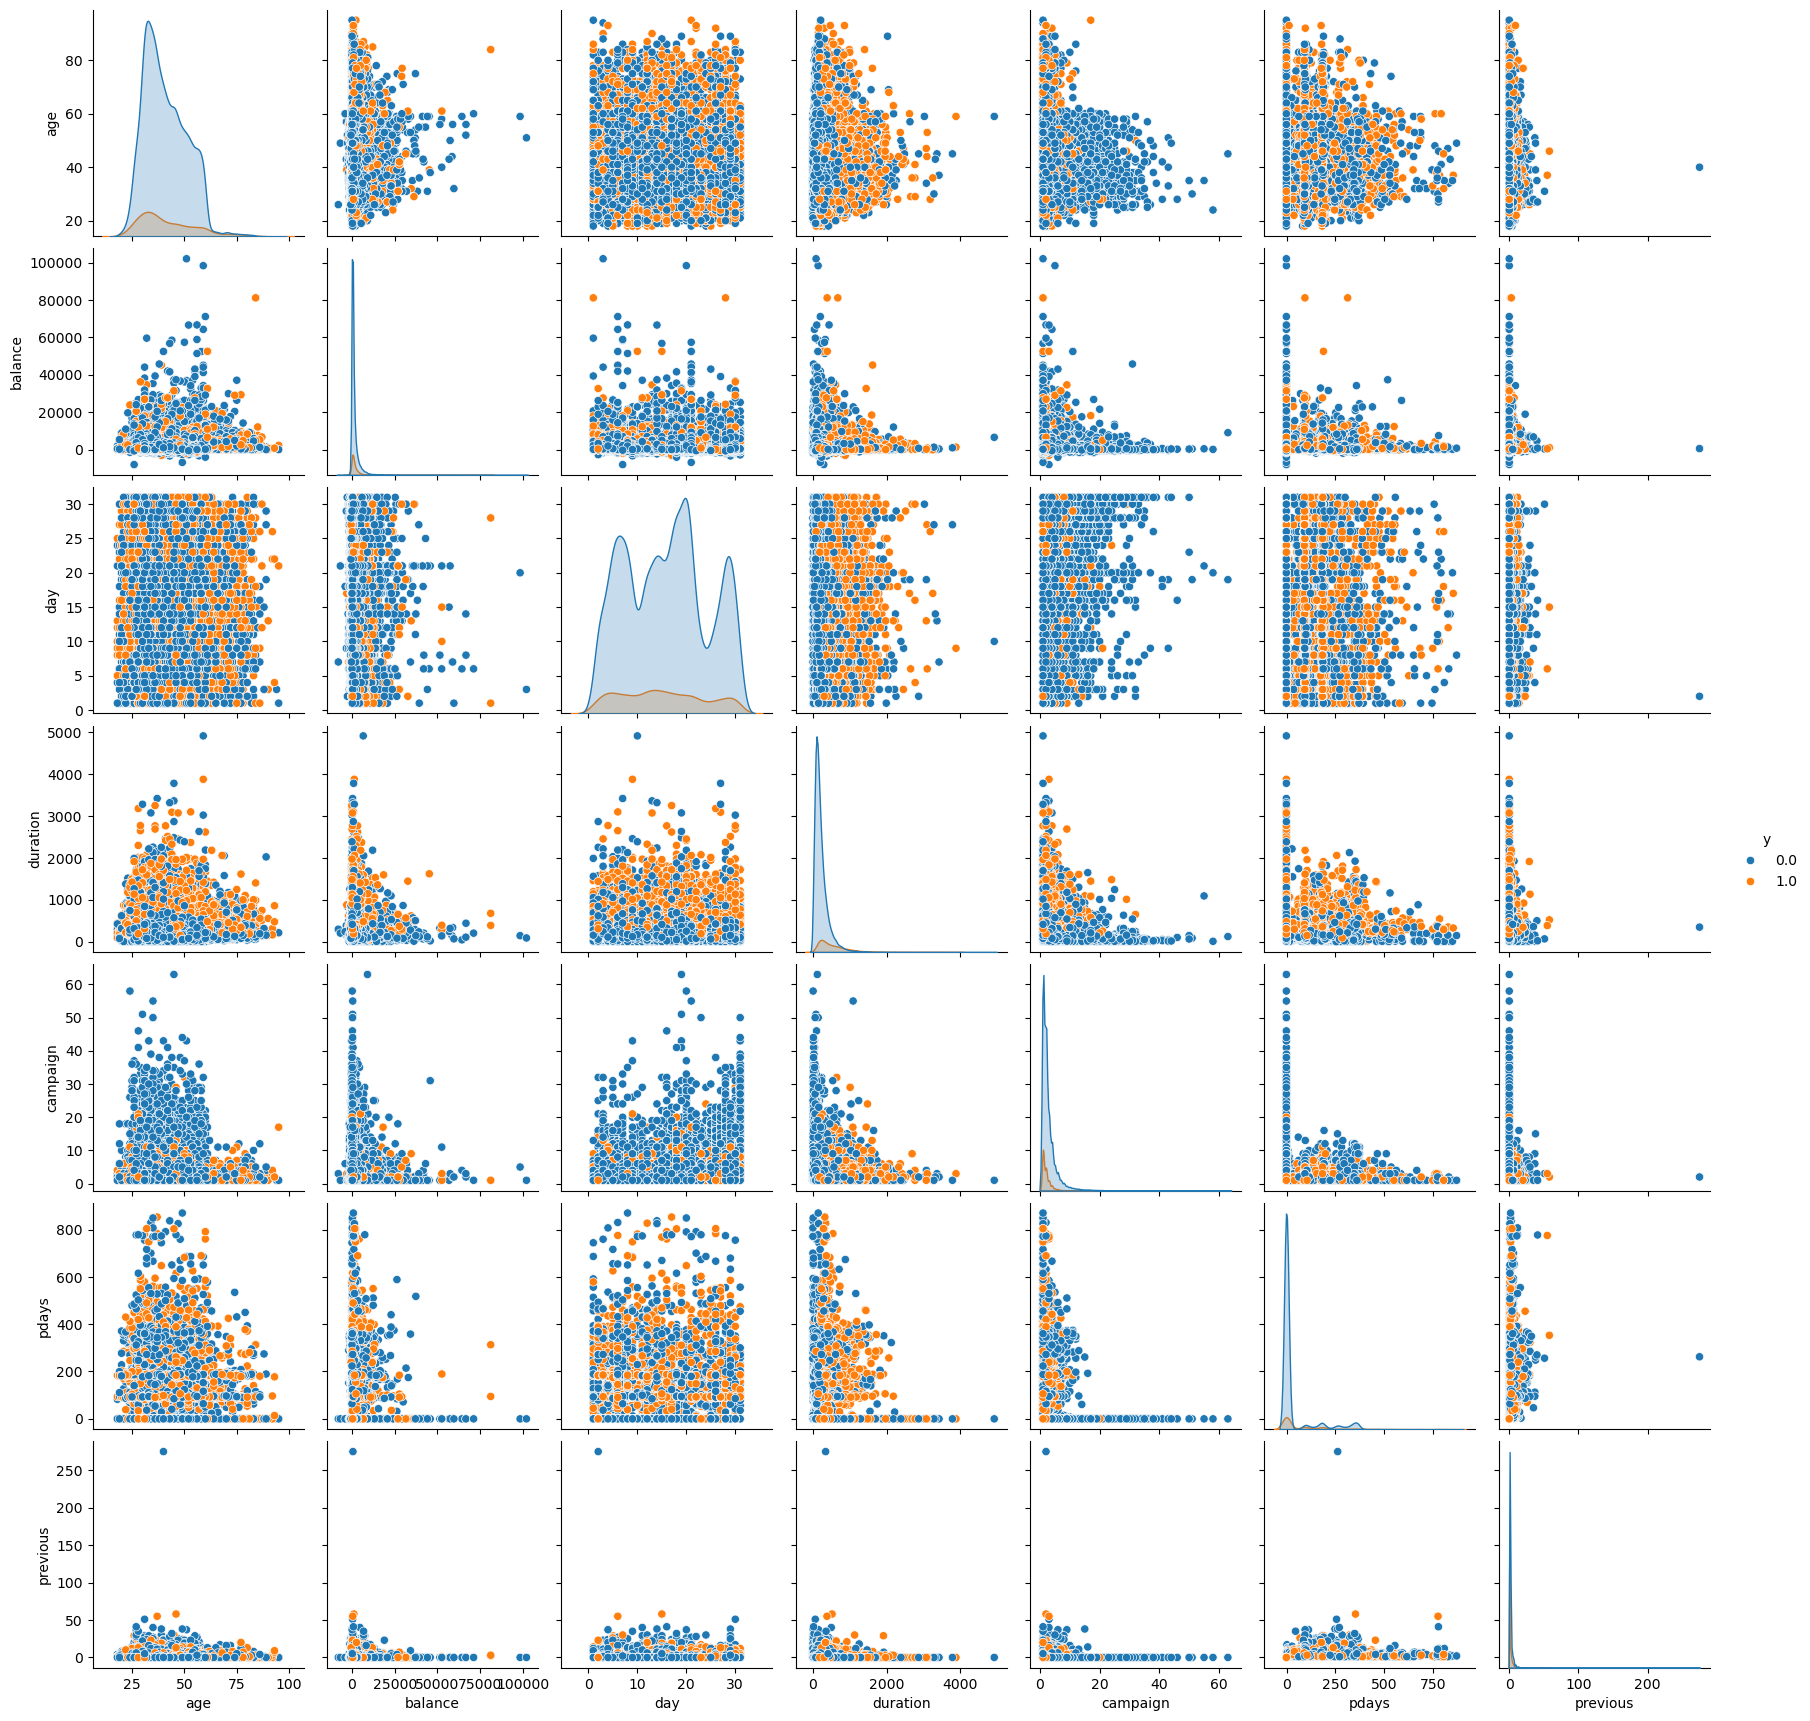

In [81]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, diag_kind='kde', hue='y')

**Penjelasan Pair Plots:** <br>
1. Mayoritas pairwise tidak menunjukkan adanya pola, kecuali pada beberapa korelasi
2. Masing-masing korelasi *balance*, *duration*, *campaign*, *pdays* memiliki korelasi negatif
3. Pola korelasi positif hanya sedikit dan nilainya sangat lemah

## Countplot

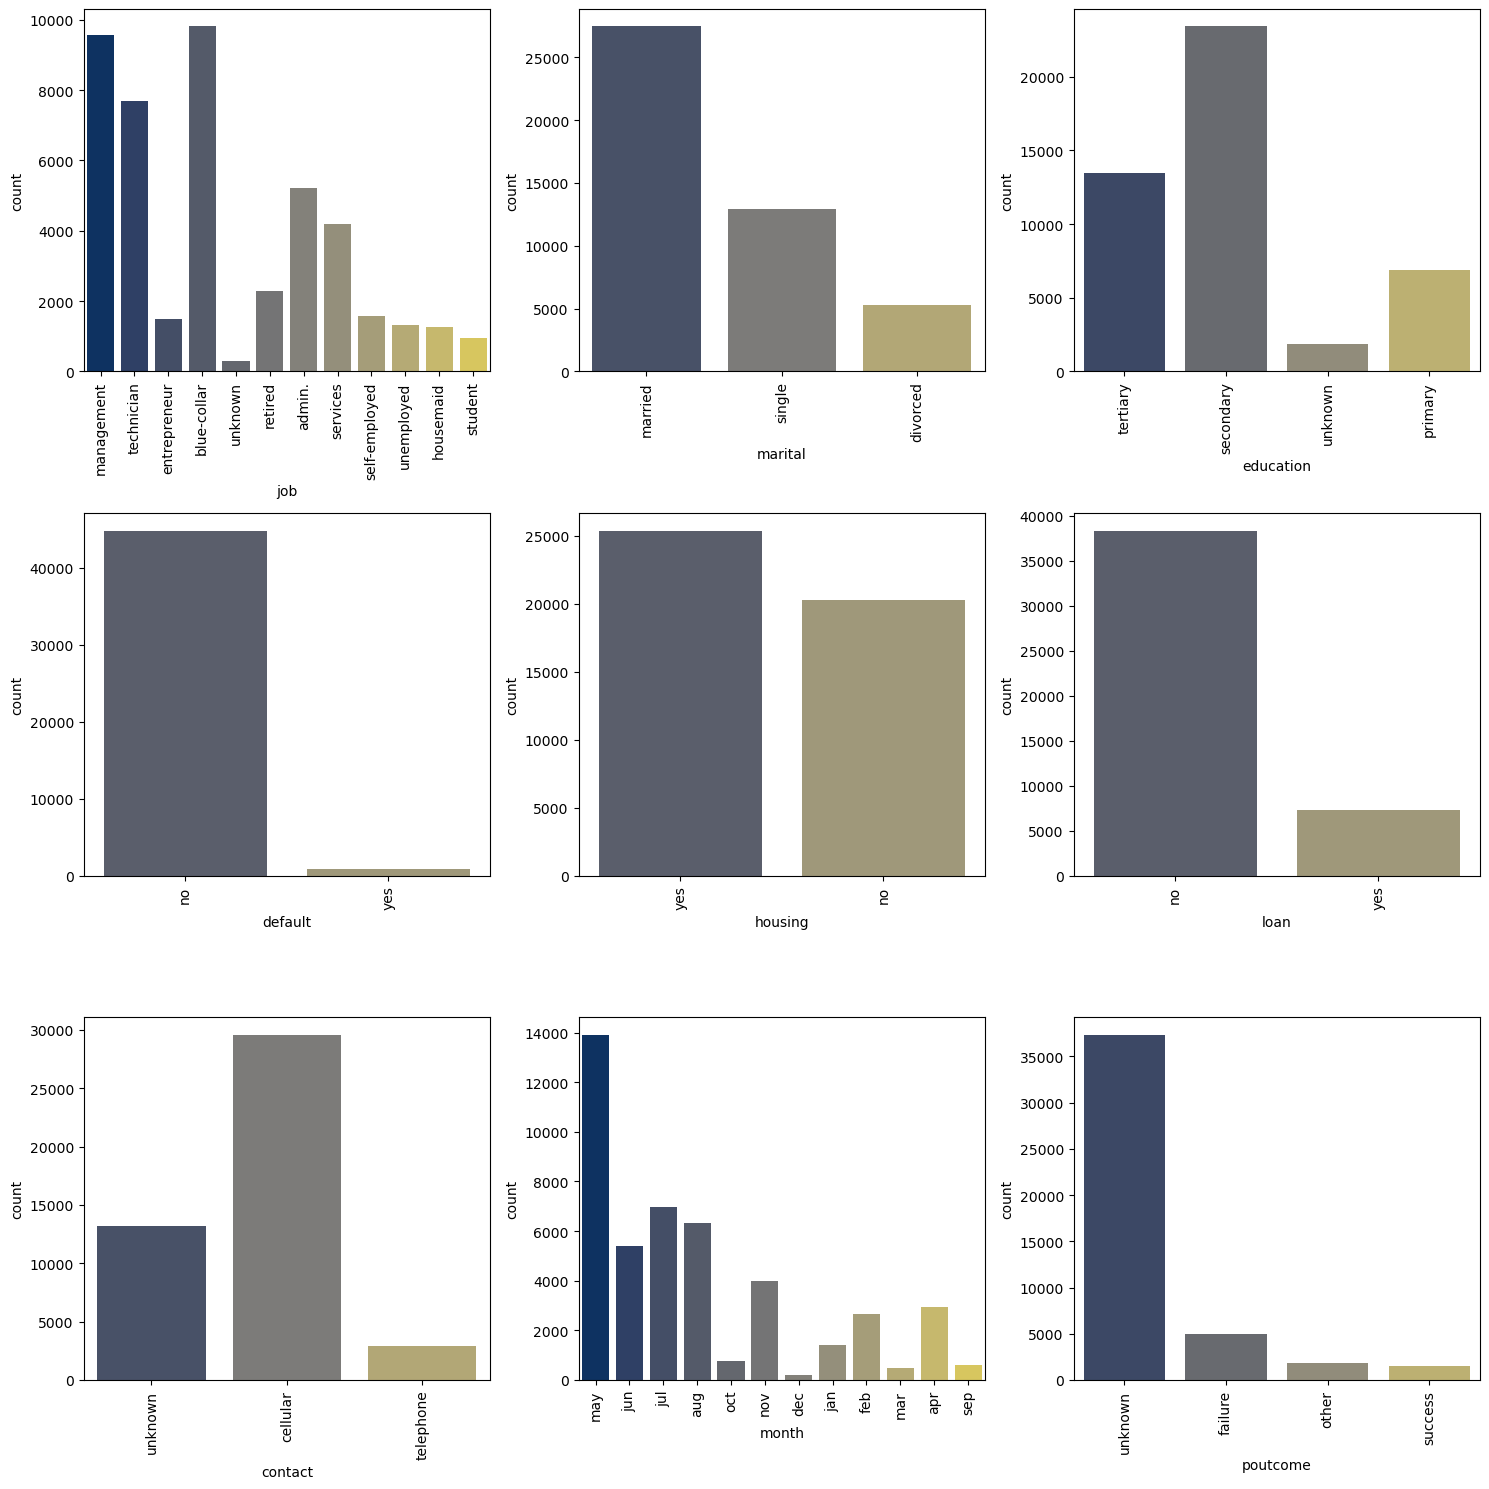

In [145]:
plt.figure(figsize=(15, 15))
features = cats
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    my_plot = sns.countplot(x=df[features[i]], palette='cividis')
    my_plot
    plt.tight_layout()
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

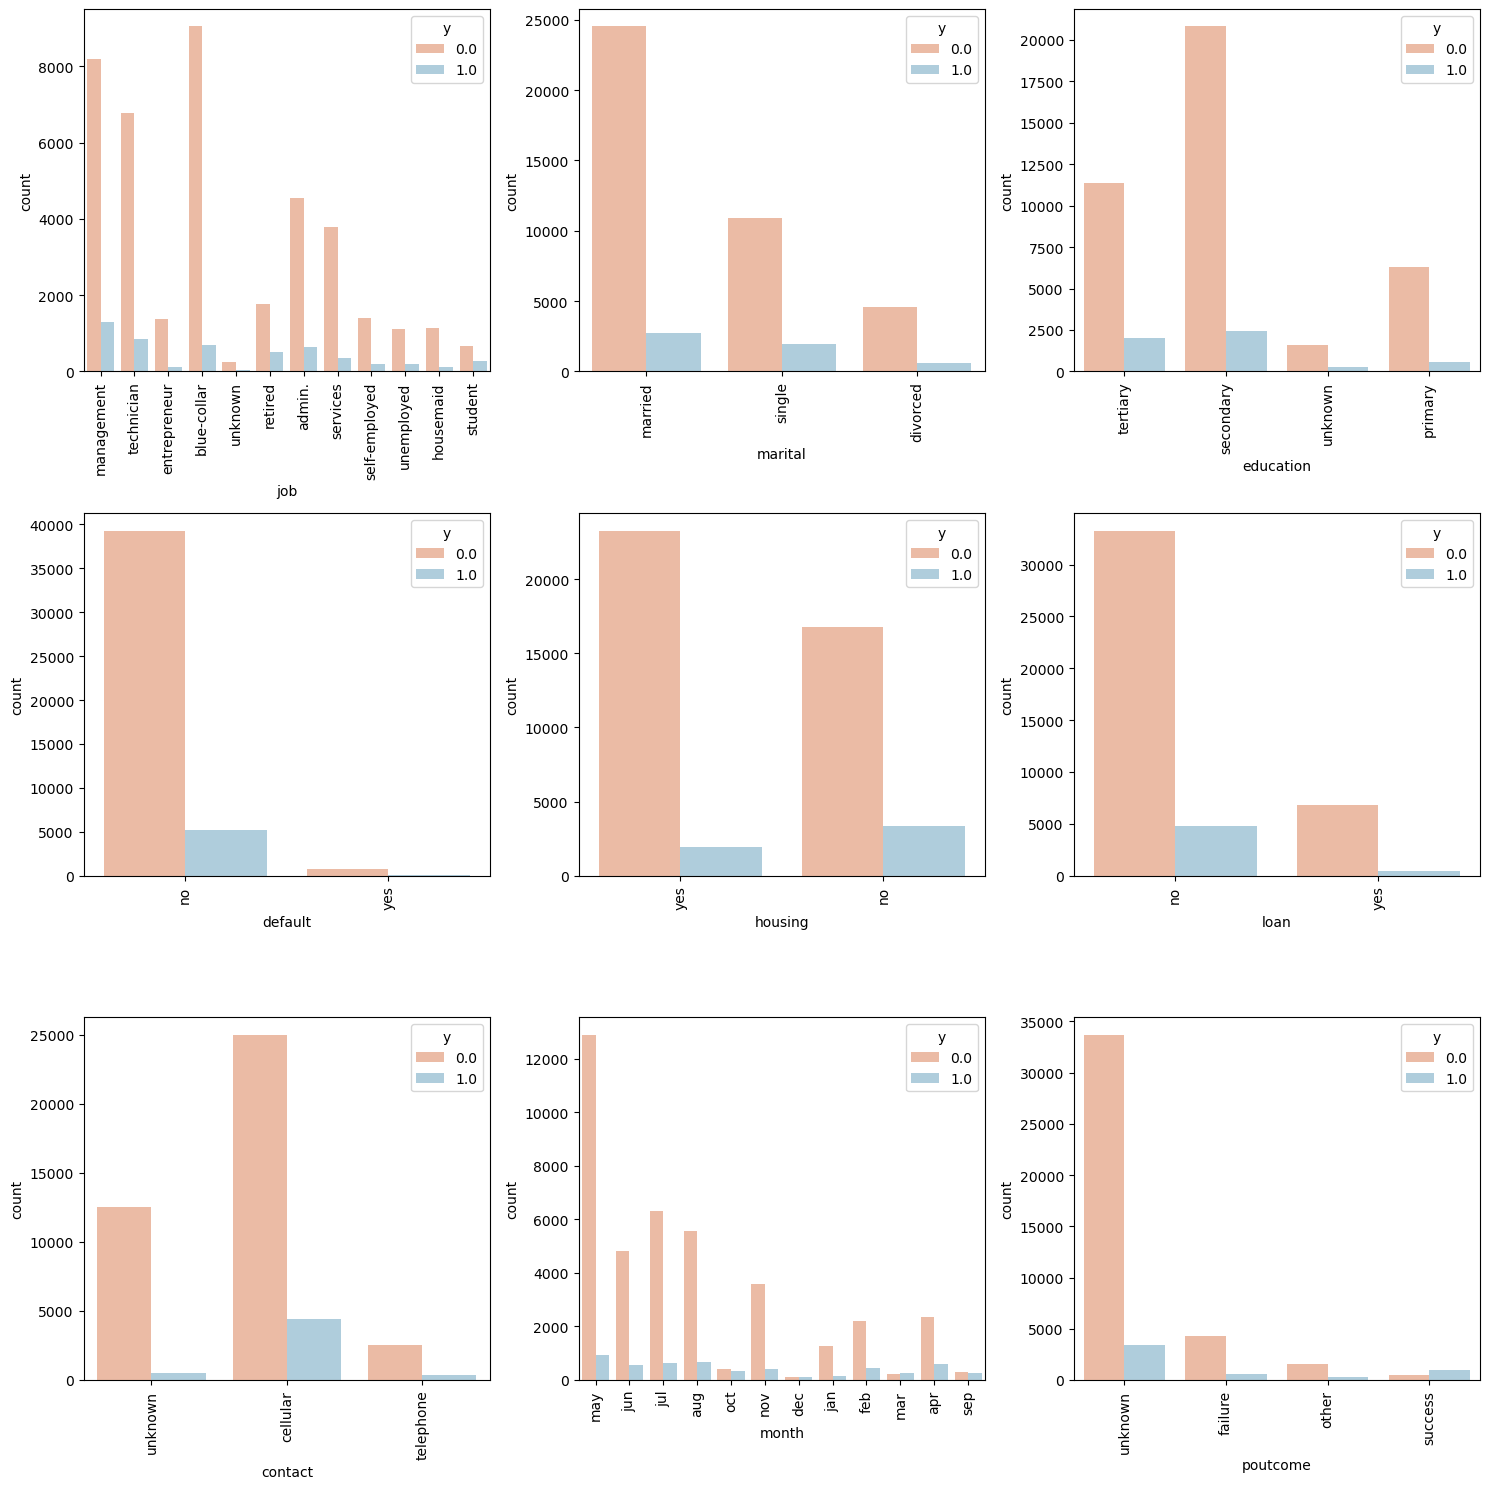

In [148]:
plt.figure(figsize=(15, 15))
features = cats
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    my_plot = sns.countplot(x=df[features[i]], palette='RdBu', hue='y', data=df)
    my_plot
    plt.tight_layout()
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

**Penjelasan Countplot:**
Berdasarkan jenis data kategori, didapatkan hasil yang berlangganan deposito berjangka. Akan tetapi pelajar memiliki tingkat rasio paling baik
1. job      : *Student* memiliki successfull rate tertinggi dibandingkan pekerjaan lainnya
2. marital  : Klien yang masih single memiliki rasio lebih kecil dalam berlangganan deposito berjangka

3. education:Klien dengan *teritory education* memiliki rasio lebih kecil dalam berlangganan deposito berjangkaa
4. default  : Klien yang berlangganan deposito berjangka mayoritas tidak memiliki kredit macet
5. housing  : Deposito berjangka dimiliki paling banyak oleh klien yang tidak memiliki pinjaman rumah
6. loan     : Paling banyak dimiliki oleh klien yang tidak memiliki pinjaman pribadi
7. contact  : Klien lebih banyak menggunakan tipe kontak *cellular*
8. month    : Bulan *may* merupakan bulan yang paling banyak melakukan kontak dengan klien dalam setahun dan menghasilkan pelanggan yang berlangganan deposito berjangka paling banyak, akan tetapi bulan *maret*, *oktober*, dan *september* memiliki rasio berlangganan deposito yang rendah dibandingkan yang lain
9. poutcome : Hasil kampanye *sukses* memiliki tingkat rasio yang paling baik

## Strip Plots

### Job

Jenis pekerjaan klien

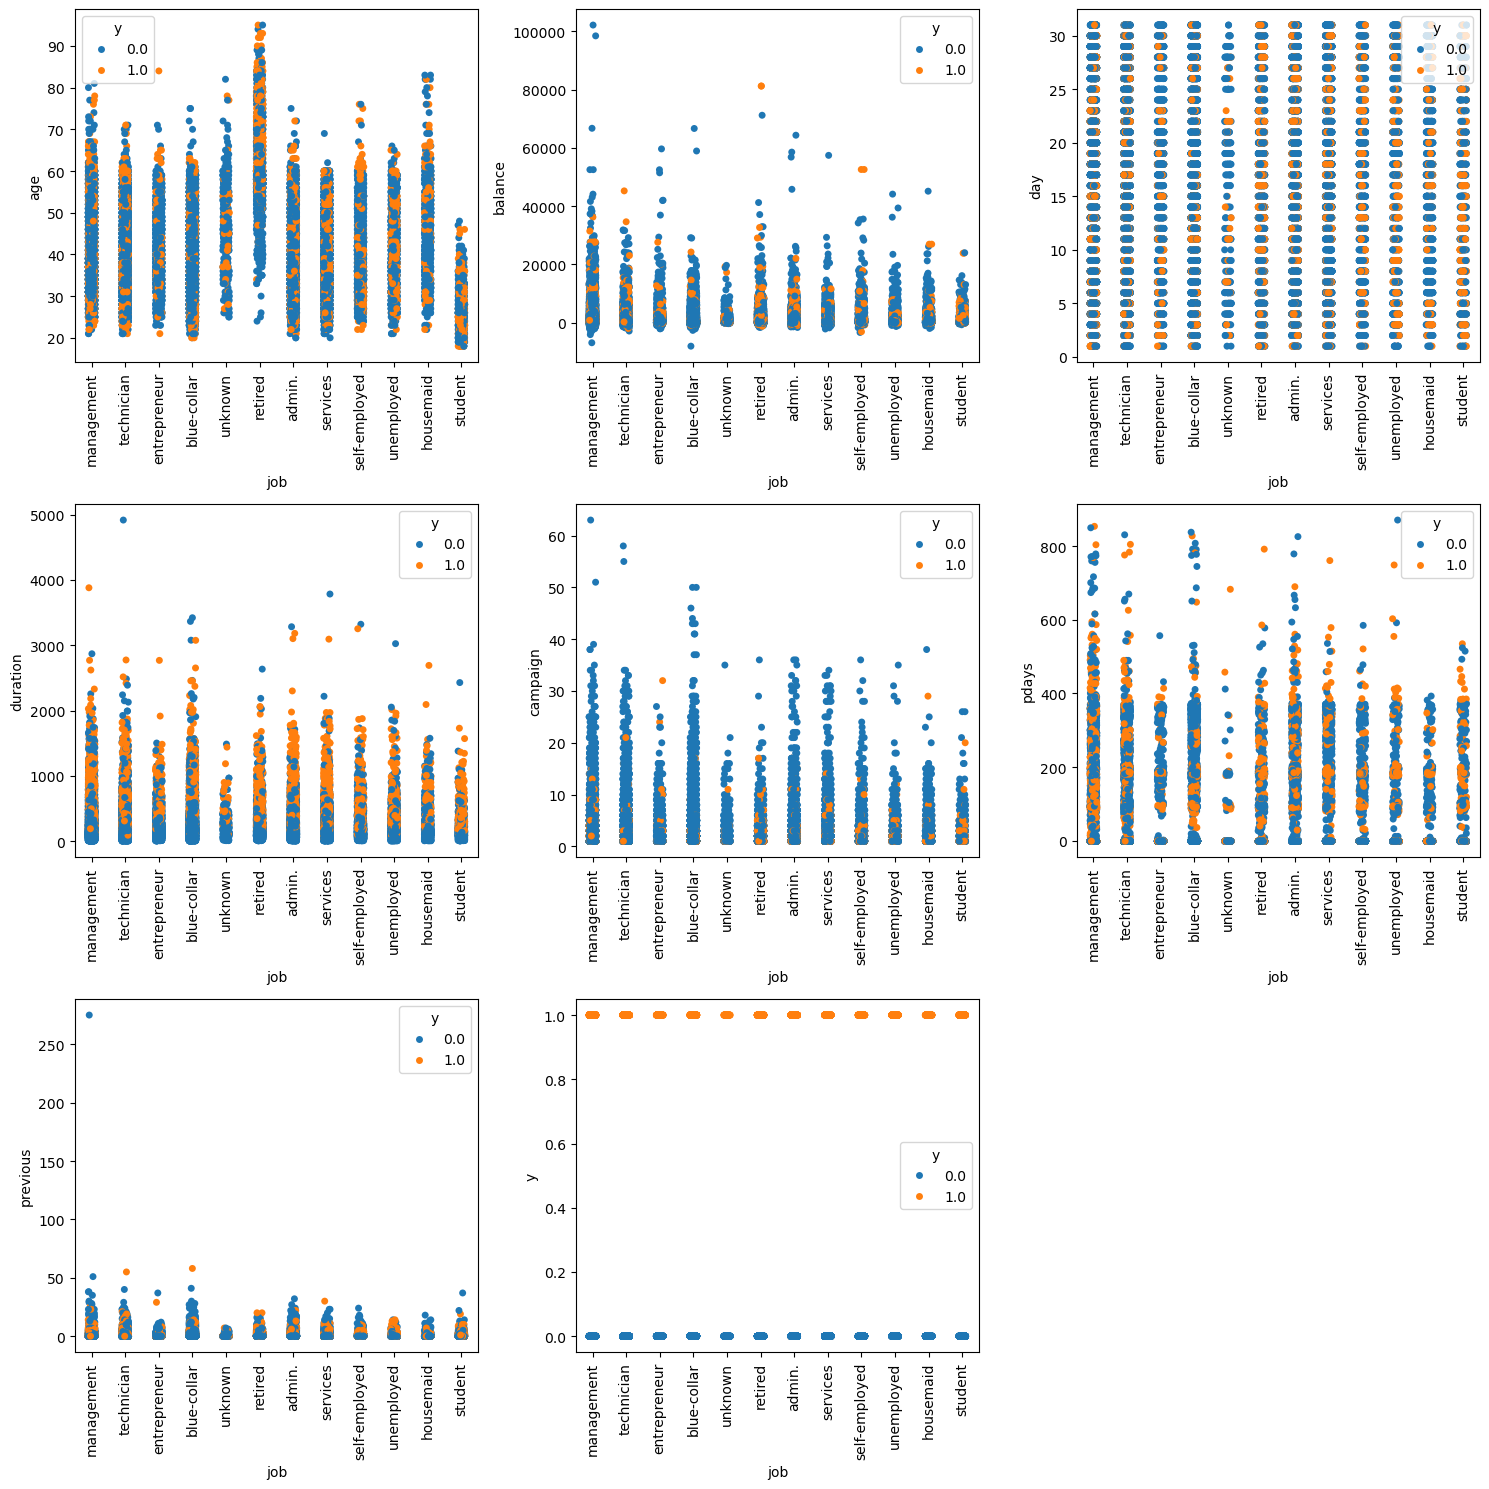

In [14]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    my_plot = sns.stripplot(ax=ax, data=df, x='job', y=nums[i], hue='y') # gambar catplot/stripplotnya
    my_plot
    plt.tight_layout()
    my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

### Marital

Status perkawinan klien

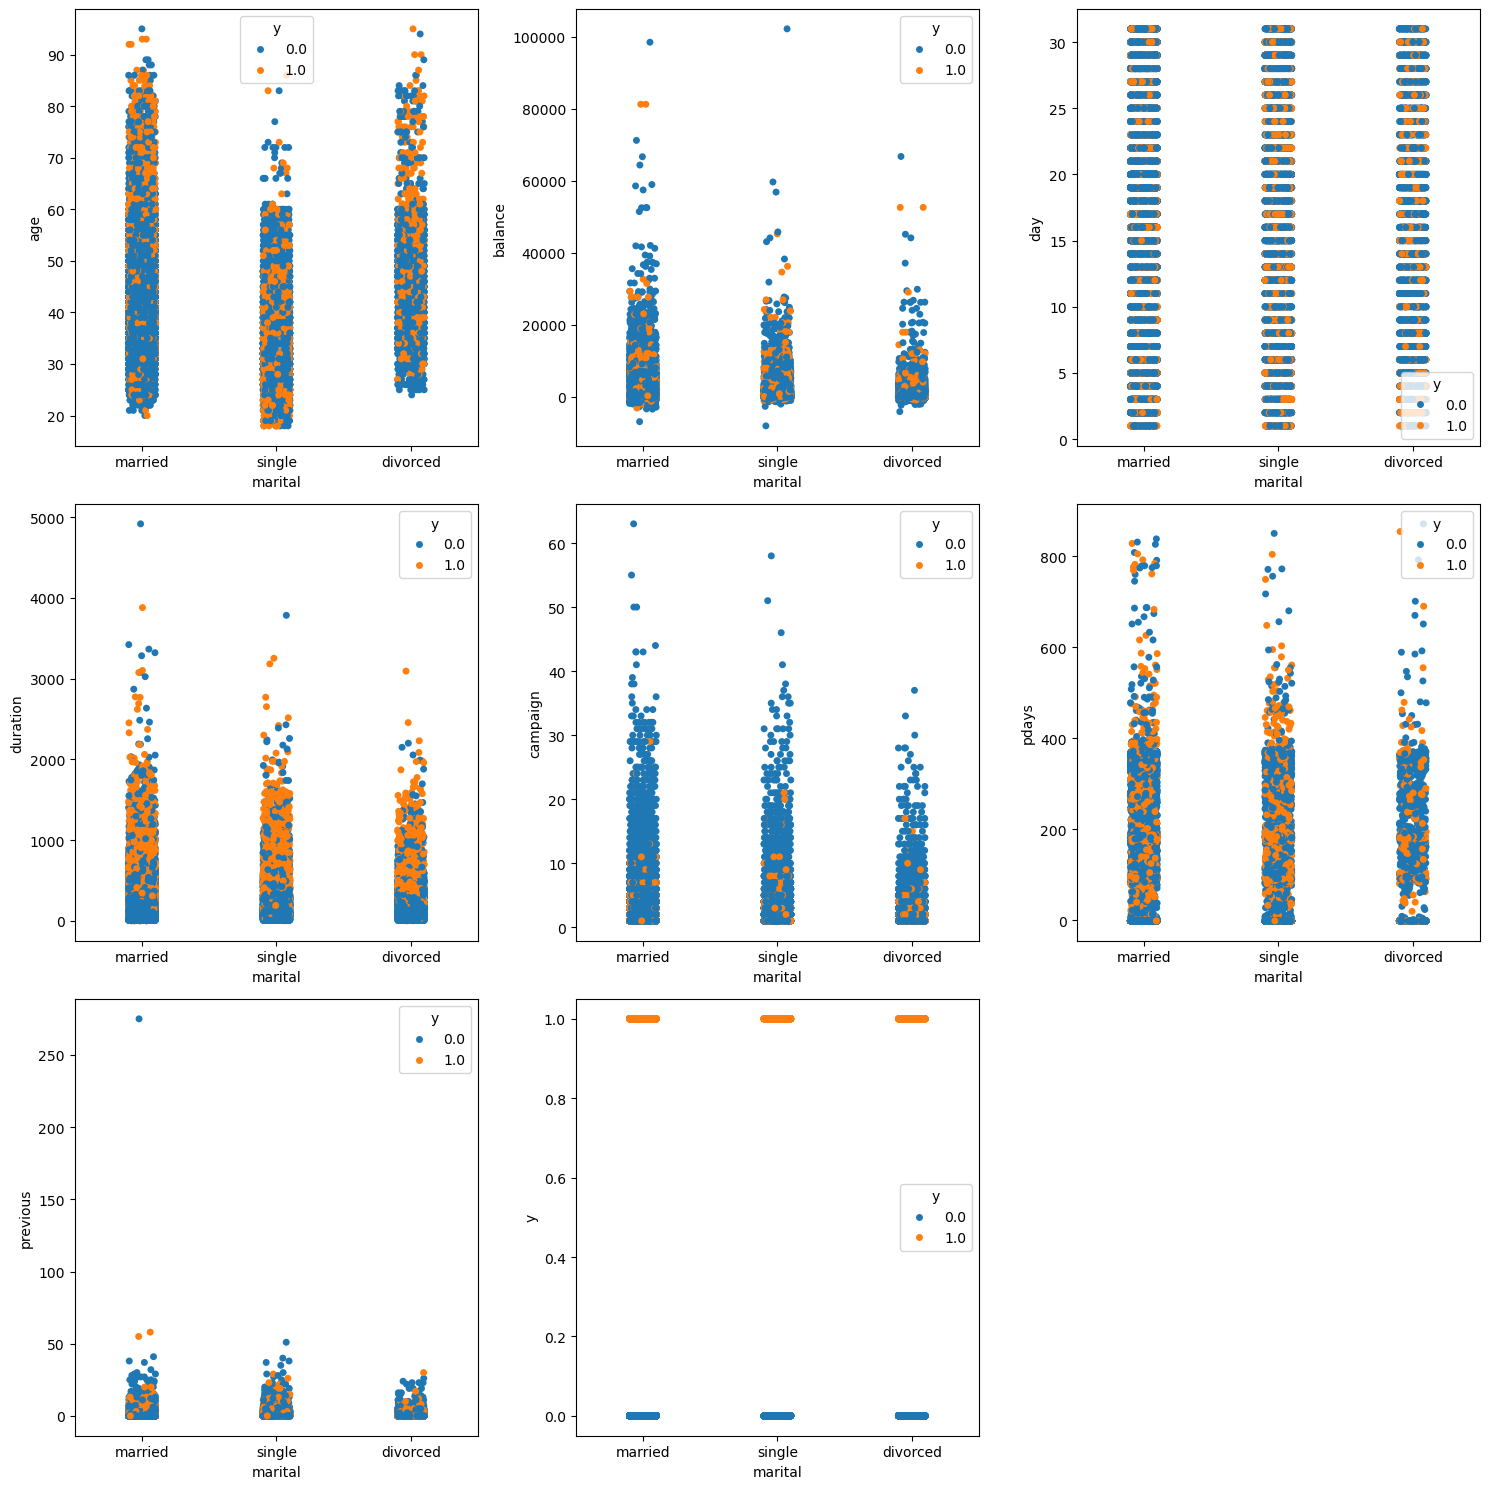

In [15]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='marital', y=nums[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

### Education

Tingkat pendidikan klien

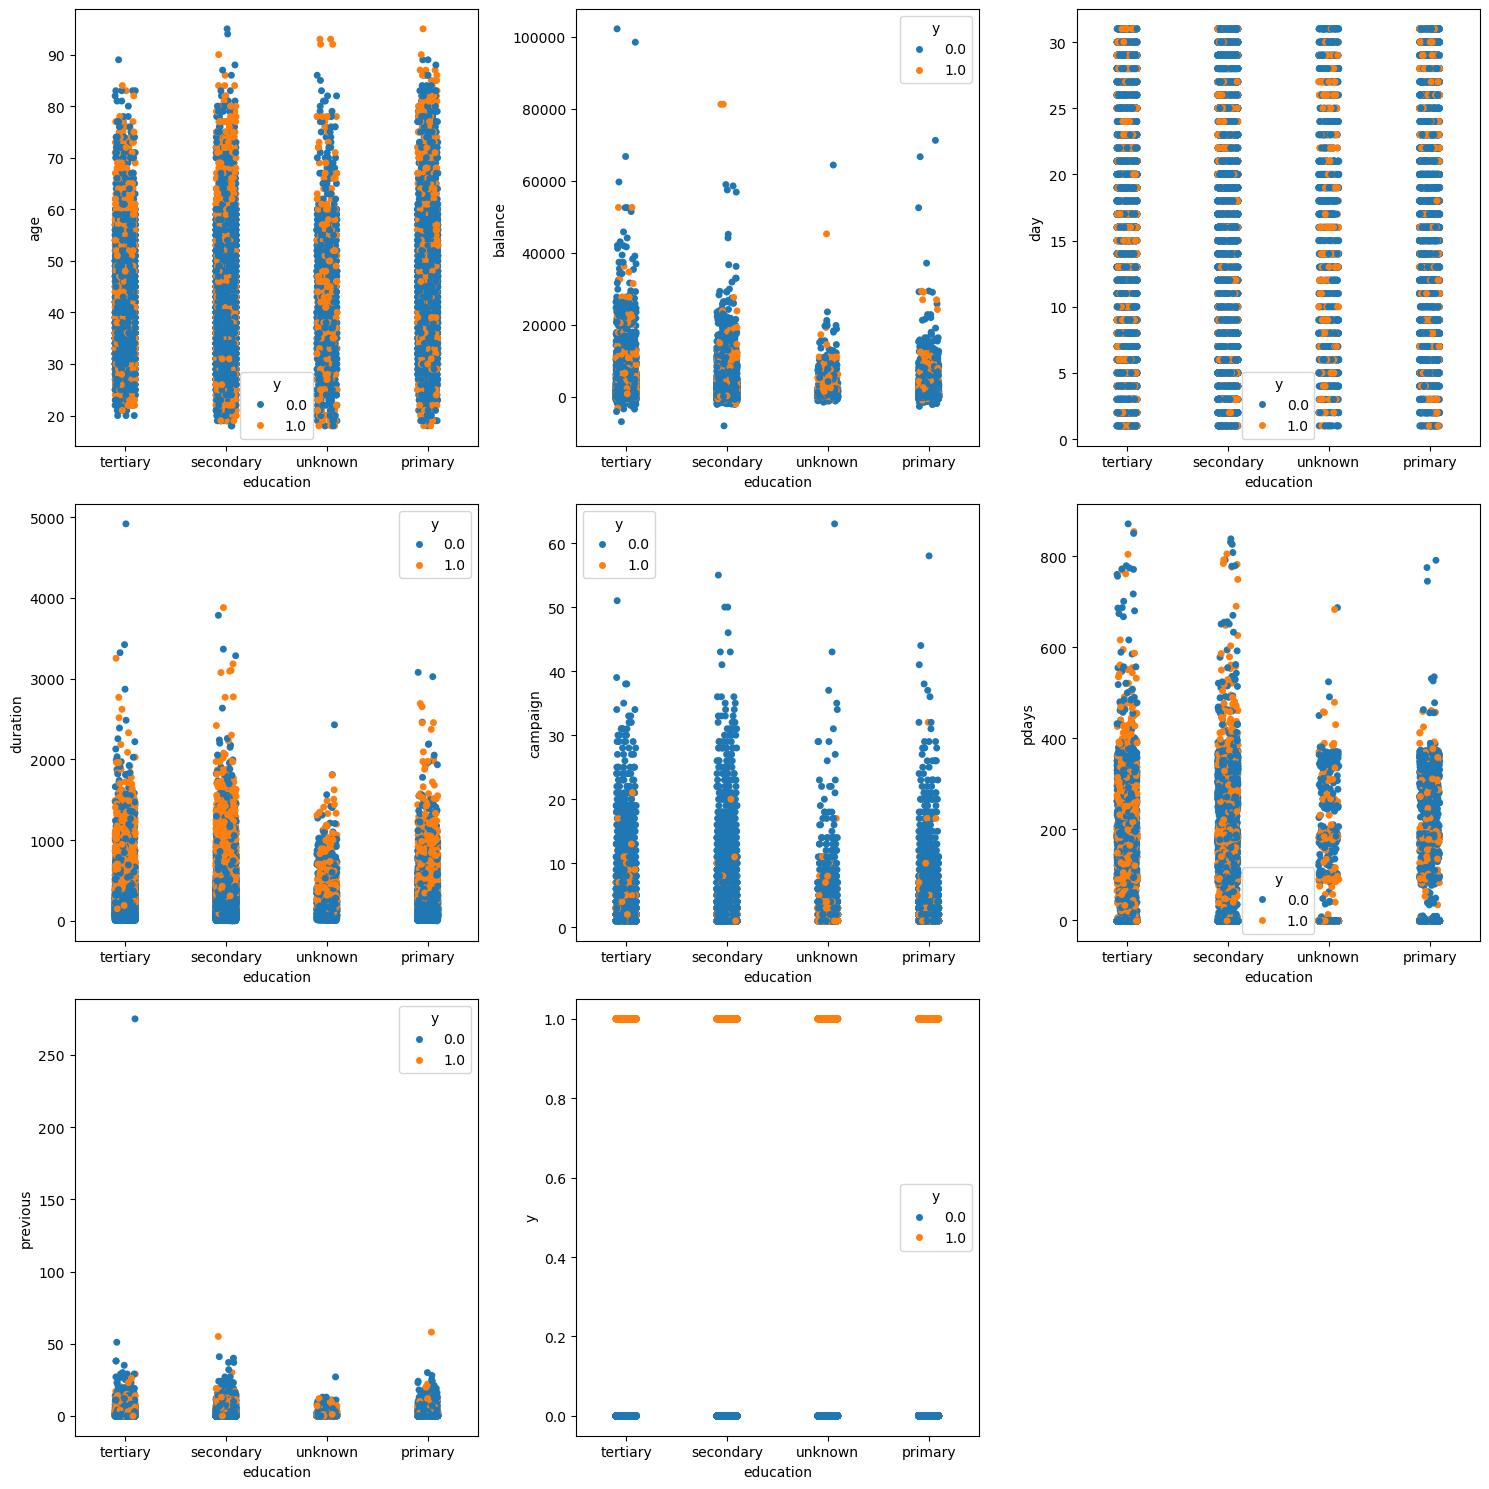

In [16]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='education', y=nums[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

### Default

Kredit macet? 

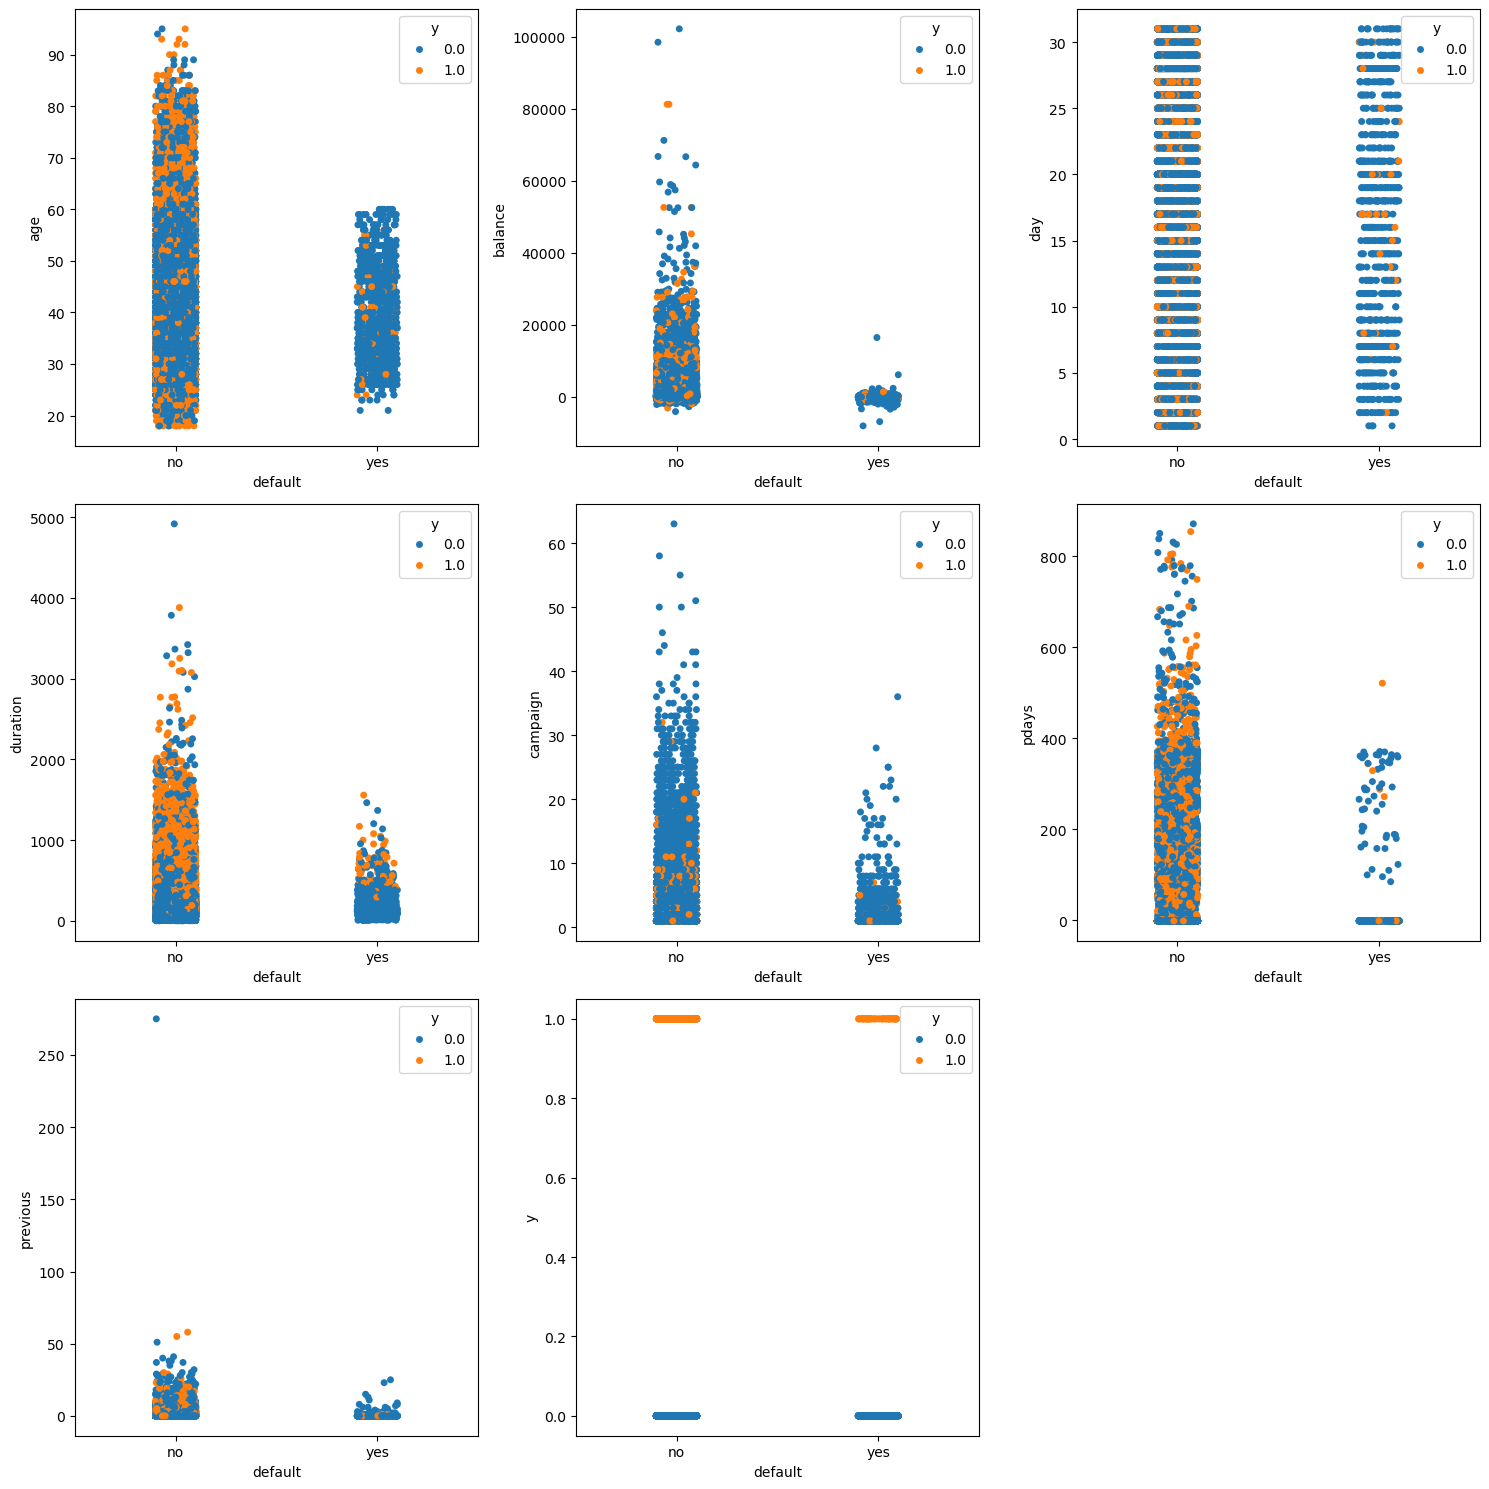

In [17]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='default', y=nums[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

### Housing

Pinjaman rumah?

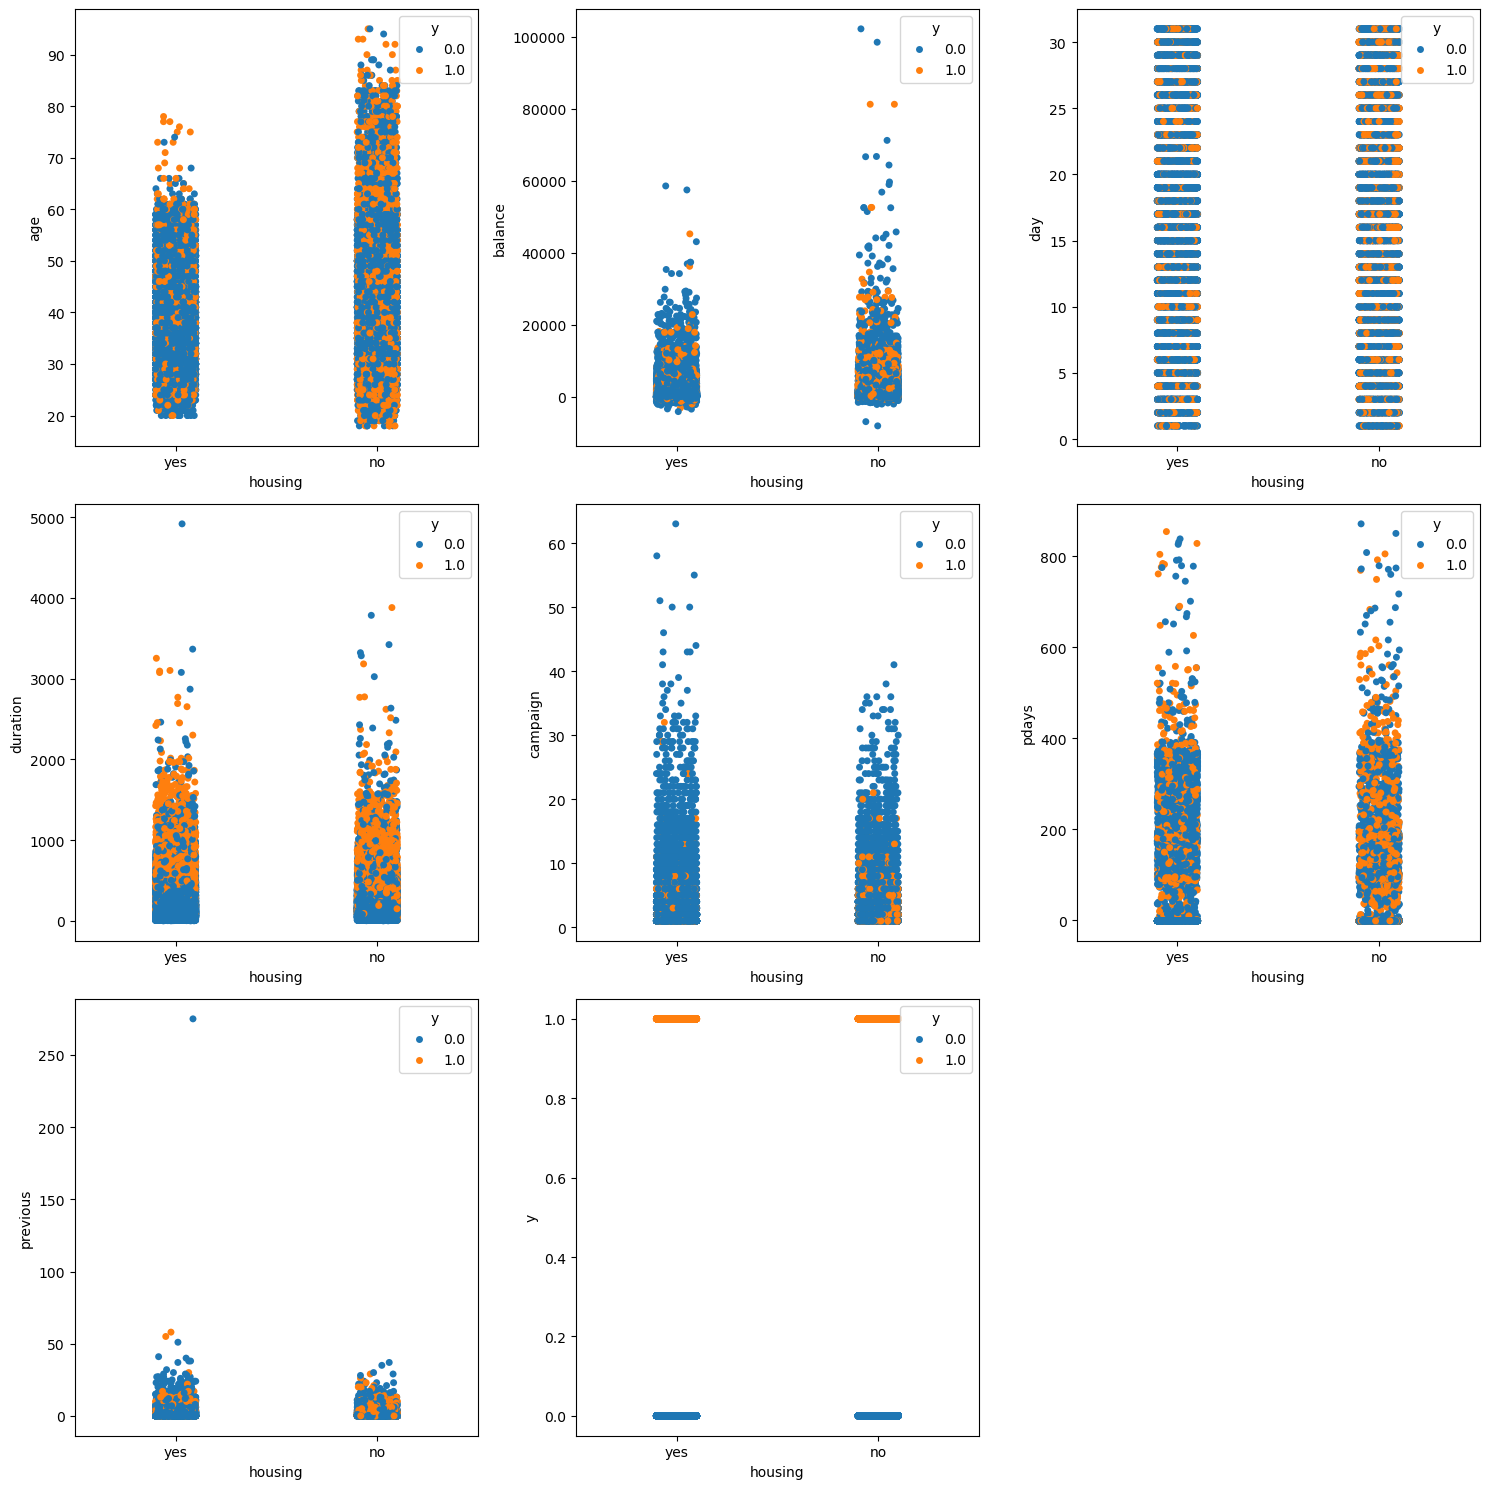

In [18]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='housing', y=nums[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

### Loan

Pinjaman pribadi?

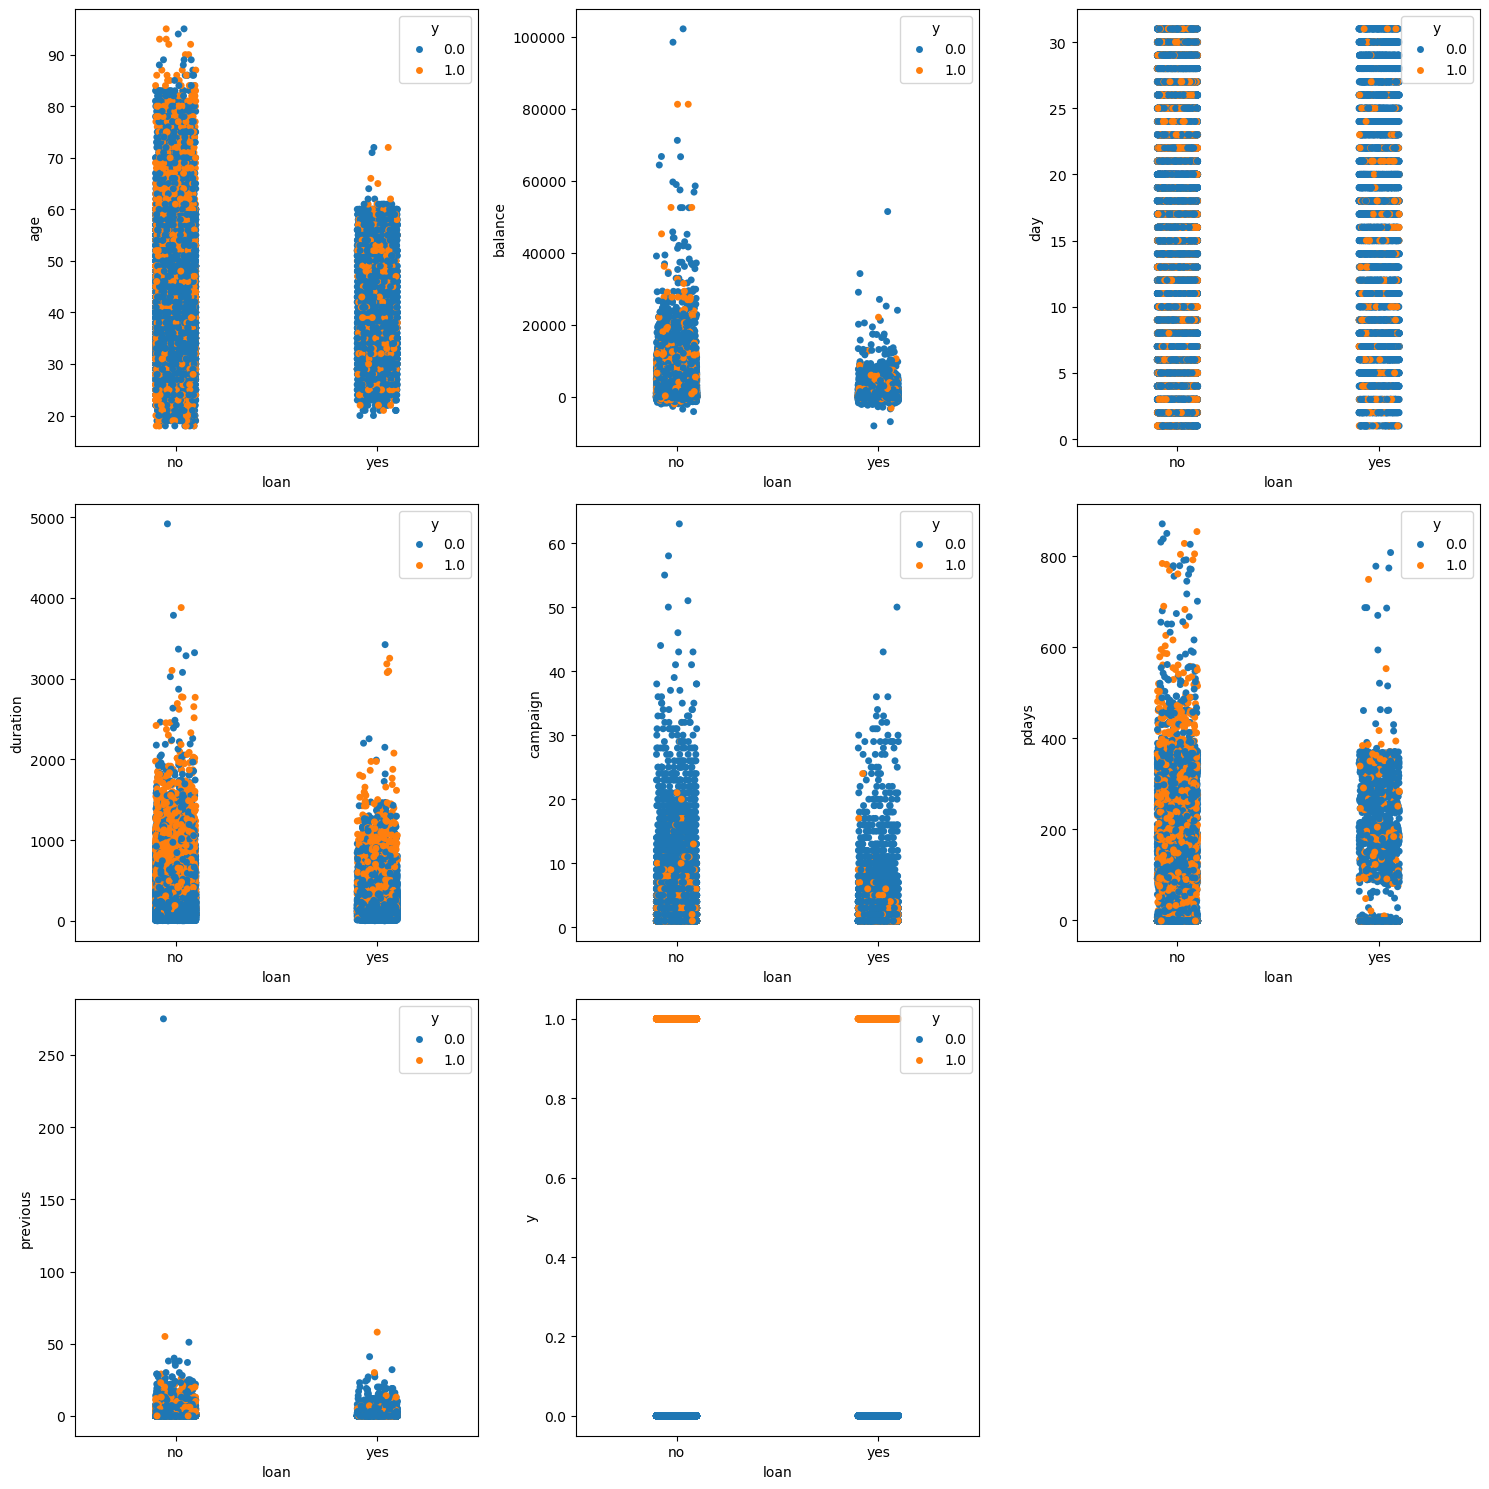

In [19]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='loan', y=nums[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

### Contact

Tipe komunikasi kontak terakhir

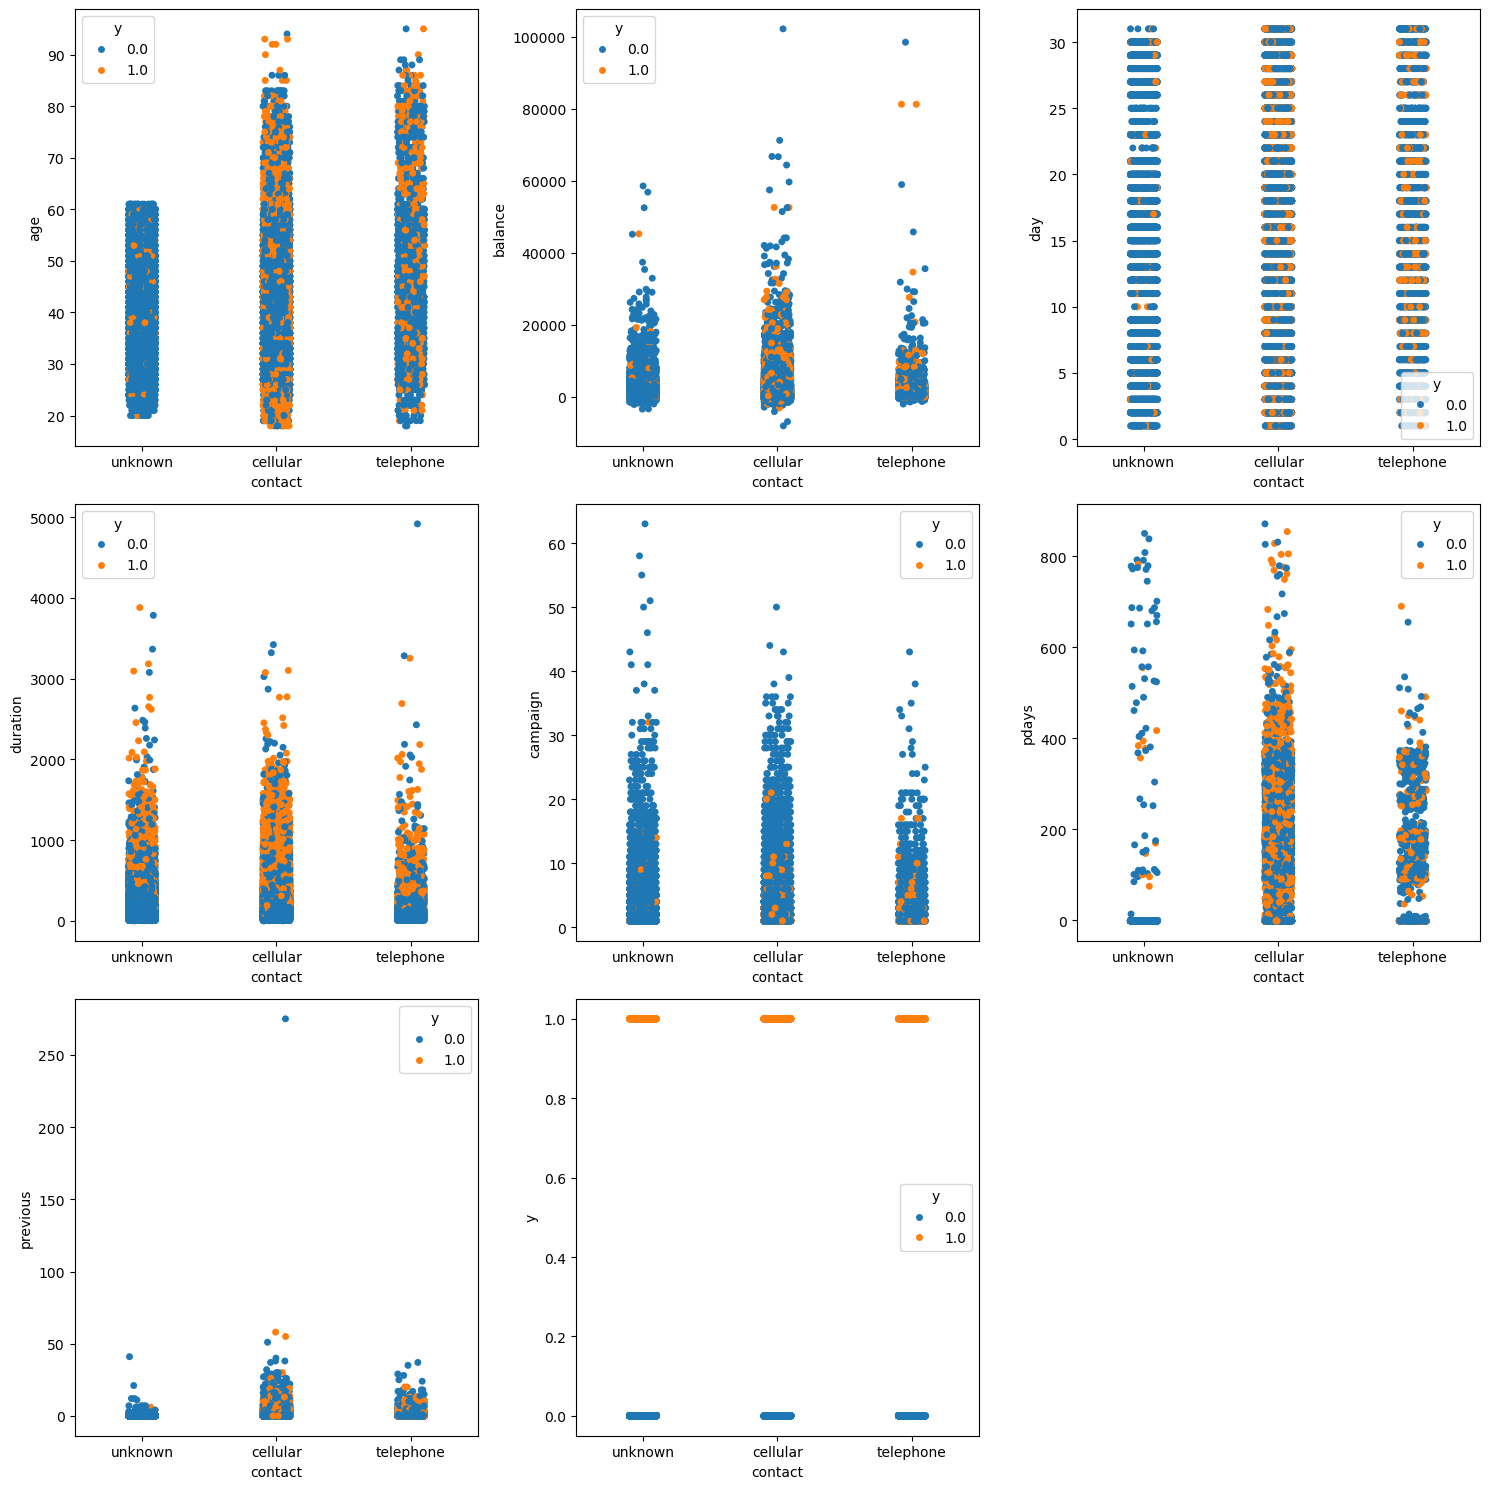

In [20]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='contact', y=nums[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

### Month

Bulan terakhir kontak dalam setahun

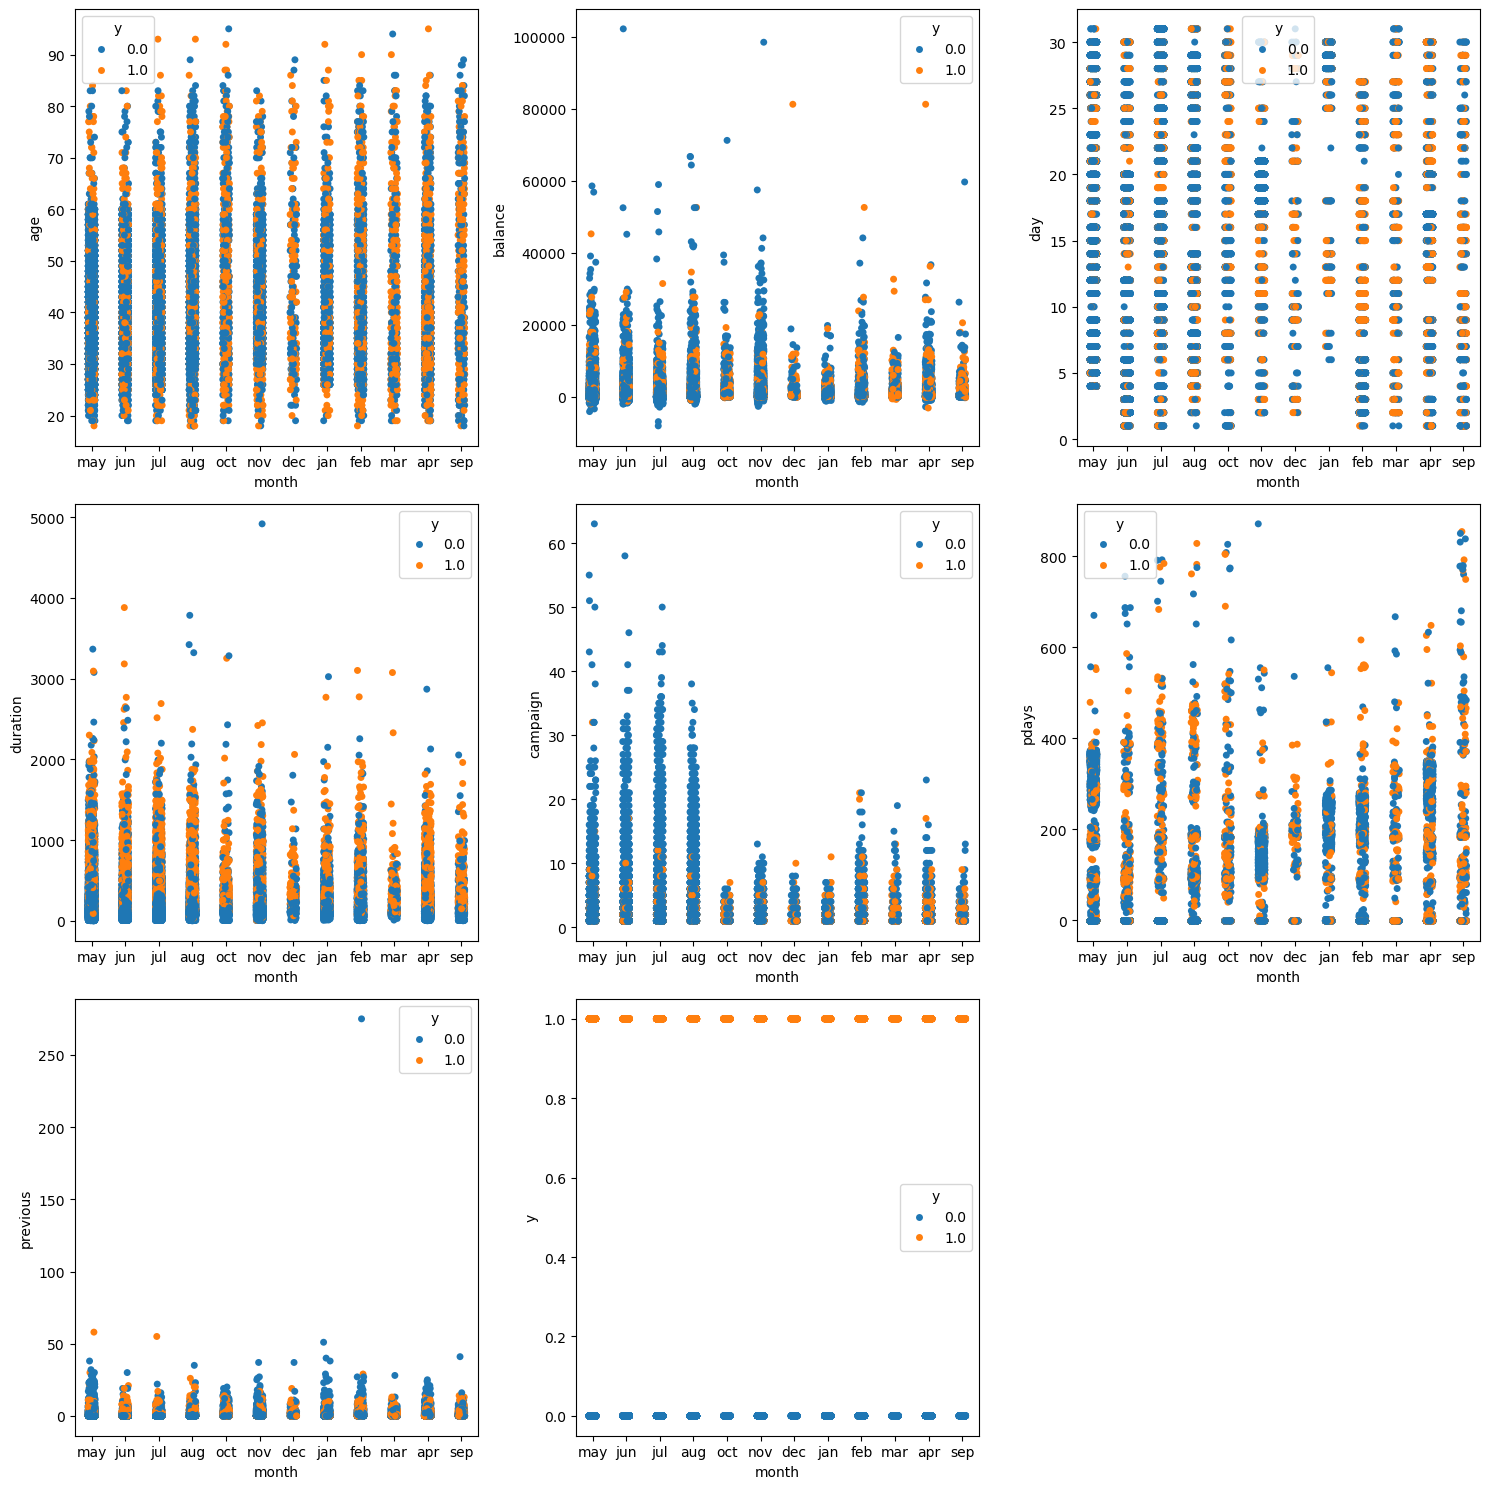

In [21]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='month', y=nums[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

### P Outcome

Hasil kampanye pemasaran sebelumnya

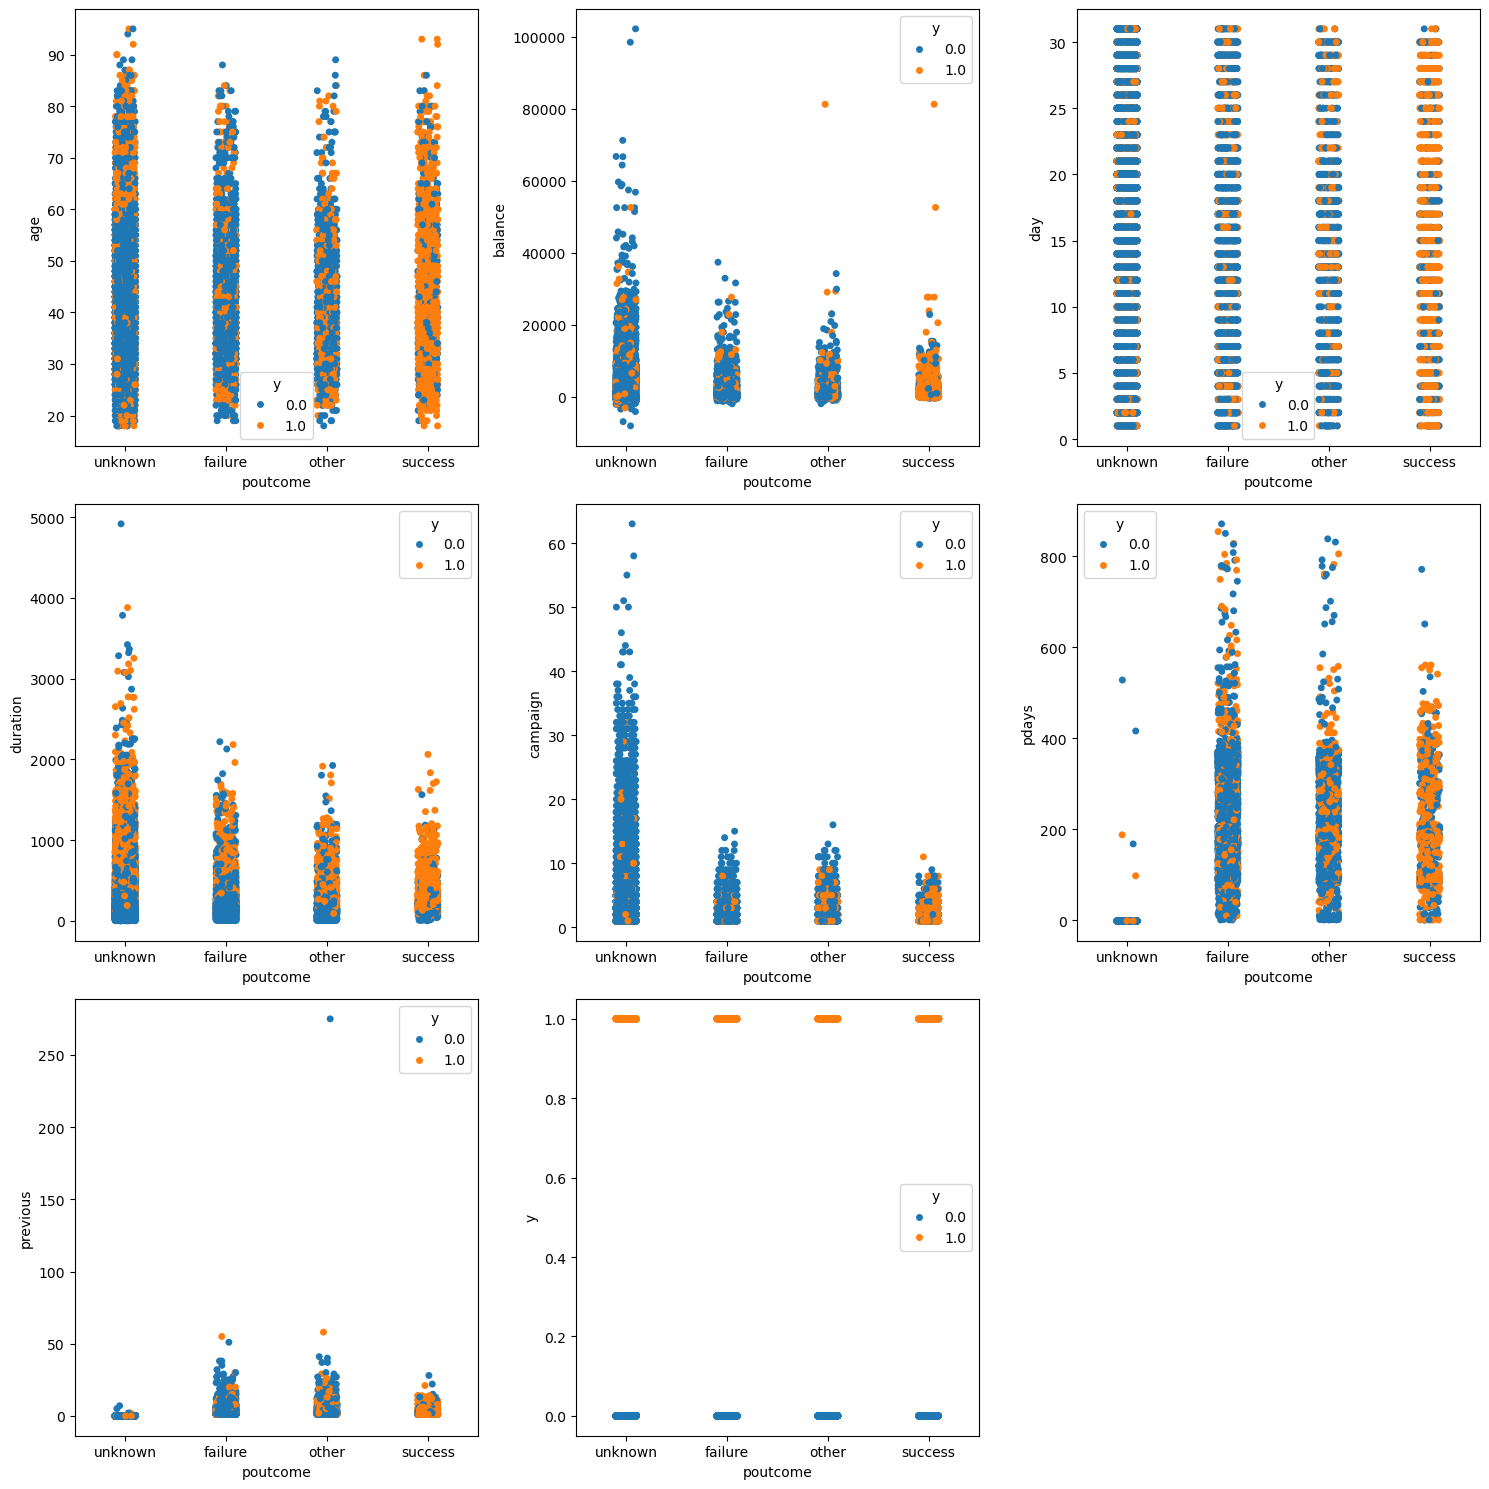

In [54]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='poutcome', y=nums[i], hue='y') # gambar catplot/stripplotnya
    plt.tight_layout()

# Kesimpulan

### A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

**A. Berdasarkan masing-masing plot**

*1. Heatmap:*
1. Mayoritas korelasi antar feature termasuk lemah karena memiliki nilai kurang dari 0.3, kecuali pada feature previous dan pdays
2. Feature duration memiliki korelasi sedang terhadap feature y atau klien berlangganan deposito. Yang dimana hal tersebut menunjukkan semakin lama durasi kontak dengan klien, maka klien berpotensi untuk berlangganan deposito
3. Terdapat korelasi kuat (diatas 0.7) yaitu pada korelasi feature previous dengan pdays, sehingga salah satu dari fitur tersebut harus dihilangkan agar tidak menyebabkan multicollinearity.

*2. Pair Plots:*
1. Mayoritas pairwise tidak menunjukkan adanya pola, kecuali pada beberapa korelasi
2. Masing-masing korelasi *balance*, *duration*, *campaign*, *pdays* memiliki korelasi negatif
3. Pola korelasi positif hanya sedikit dan nilainya sangat lemah

*3. Countplot:* <br>
Berdasarkan jenis data kategori, didapatkan hasil yang berlangganan deposito berjangka
1. job      : Paling banyak dimiliki oleh pekerjaan *management*
2. marital  : Klien yang sudah menikah lebih banyak berlangganan deposito berjangka
3. education: Klien dengan *secondary education* paling banyak berlangganan deposito berjangka
4. default  : Klien yang berlangganan deposito berjangka mayoritas tidak memiliki kredit macet
5. housing  : Deposito berjangka dimiliki paling banyak oleh klien yang tidak memiliki pinjaman rumah
6. loan     : Paling banyak dimiliki oleh klien yang tidak memiliki pinjaman pribadi
7. contact  : Klien lebih banyak menggunakan tipe kontak *cellular*
8. month    : Bulan *may* merupakan bulan yang paling banyak melakukan kontak dengan klien dalam setahun
9. poutcome : Hasil kampanye *sukses* memiliki tingkat rasio yang paling baik

**B. Kesimpulan dari analisis EDA (Exploratory Data Analysis) pada dataset tersebut adalah sebagai berikut:**

1. Korelasi antara fitur-fitur mayoritas lemah, kecuali antara fitur 'previous' dan 'pdays' yang memiliki korelasi kuat (di atas 0.7). Hal ini menunjukkan bahwa ada hubungan yang signifikan antara jumlah kontak sebelumnya dengan klien dan jumlah hari sejak kontak terakhir.
2. Durasi kontak dengan klien ('duration') memiliki korelasi sedang terhadap kemungkinan klien berlangganan deposito ('y'). Semakin lama durasi kontak, semakin tinggi kemungkinan klien berlangganan deposito.
3. Pada pair plots, mayoritas tidak menunjukkan pola yang jelas, kecuali adanya korelasi negatif antara 'balance', 'duration', 'campaign', dan 'pdays'.

**C. Berdasarkan countplot, beberapa insight yang ditemukan:**

1. Klien dengan pekerjaan 'management' memiliki jumlah tertinggi dalam berlangganan deposito berjangka.
2. Klien yang sudah menikah lebih cenderung untuk berlangganan deposito berjangka.
3. Klien dengan pendidikan 'secondary education' merupakan mayoritas yang berlangganan deposito berjangka.
4. Mayoritas klien yang berlangganan deposito berjangka memiliki kredit macet.
5. Klien yang tidak memiliki pinjaman rumah atau pinjaman pribadi cenderung lebih banyak berlangganan deposito berjangka.
6. Mayoritas kontak dengan klien dilakukan melalui tipe kontak 'cellular'.
7. Bulan 'may' adalah bulan dengan jumlah kontak terbanyak dengan klien dalam setahun.
8. Masih belum jelas maksud dari kategori 'unknown' pada fitur 'poutcome'.

**D. Rekomendasi fitur yang harus dipertahankan:**

1. 'duration': Karena memiliki korelasi sedang dengan target variabel 'y' dan memiliki pengaruh yang signifikan terhadap kemungkinan klien berlangganan deposito.
2. 'previous' atau 'pdays': Salah satu dari fitur ini harus dipertahankan karena keduanya memiliki korelasi kuat dan menunjukkan hubungan yang signifikan dengan kemungkinan klien berlangganan deposito. Namun, perlu dilakukan analisis lebih lanjut untuk memilih fitur yang lebih relevan untuk dimasukkan dalam model.
   
**E. Saran lainnya:**

1. Melakukan investigasi lebih lanjut terhadap kategori 'unknown' pada fitur 'poutcome' untuk memahami lebih lanjut arti dari kategori tersebut.

### B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

1. Berdasarkan heatmap mayoritas korelasi antar feature termasuk lemah karena memiliki nilai kurang dari 0.3, kecuali pada feature previous dan pdays yang memiliki nilai korelasi kuat (>0.7) sehingga salah satunya harus dihilangkan. Secara statistik berdasarkan nilai korelasi Spearman terhadap feature target '*y*, fitur *previous* memiliki korelasi yang lebih tinggi dibandingkan dengan *pdays* sehingga kita bisa mempertahankan feature *previous* dan menghilangkan feature *pdays*

2. Feature *duration* memiliki korelasi sedang terhadap feature *y* atau klien berlangganan deposito. Hal tersebut menunjukkan semakin lama durasi kontak dengan klien, maka klien berpotensi untuk berlangganan deposito

3. Pada pair plots, mayoritas tidak menunjukkan pola yang menarik, kecuali adanya korelasi negatif antara 'balance', 'duration', 'campaign', dan 'pdays'.
